<img src="./img/escudo-un.png" alt="Escudo Universidad Nacional de Colombia" width="400"/>

# Laboratorio 2:
### Santiago Álvarez Sepúlveda
### Correo: *saalvarezse@unal.edu.co*
### Código: *25481031*
### Algoritmos, Grupo 1
---

**Insertion Sort:**
Desarrolle programas en Python que ejecuten Insertion Sort sobre todas permutaciones que generen la distribución y el numero promedio de  (4 casos): 
* numero instrucciones (lineas),  
* numero de comparaciones,  
* numero de intercambios  y 
* numero de preguntas en el while. 

Para cada caso haga dos versiones una  usando permutations de Itertools y determinando hasta que valor puede generar las permutaciones en memoria y  otra version usando el  codigo recursivo de Daniel Jimenez para generar todas las permutaciones (8 Programas).  Se puede basar en el código Java de los Applets InsertSortTimePlot, InsertSortCompPlot y InsertSortWhileQuestionsPlot y en código Python para InsertionSort   del IPython notebook: corrección y análisis de algoritmos y el codigo insertionsort.py. Publique el código y los resultados en Github como Ipython notebooks. 

In [15]:
# Importar librerías
import random
import itertools
import numpy as np
from math import factorial
import matplotlib.pyplot as plt

# Constantes Globales
DEBUG = True # Hacer True para depurar en pantalla, False para analisis de mayor longitud soportada por la memoria.

# Clases Implementadas
'''
Class Counter
Implements a step counter, which is used to compute the number of basic operations performed in
a particular call to a function.
    '''
class Counter:
    def __init__(self):
        self.reset()
        
    def reset(self):
        self.instr = 0
        self.comps = 0
        self.inter = 0
        self.pregs = 0

    def count(self, instr=0, comps=0, inter=0, pregs=0):
        self.instr += instr
        self.comps += comps
        self.inter += inter
        self.pregs += pregs

    def print_results(self):
        print 'instrucciones: %d, comparaciones: %d, intercambios: %d, preguntas: %d'%(self.instr, self.comps, self.inter, self.pregs)

# Funciones Implementadas
'''
Función: plot_distribution
'''
def plot_distribution(name, arr, mean, std, n, color):
    print name
    #print arr
    print 'promedio: %f, std: %f'%(mean, std)
    plt.figure(), plt.title(u'Distribución %s orden %d'%(name, n))
    plt.hist(arr, max(arr)-min(arr) if max(arr)-min(arr) > len(set(arr)) else len(set(arr)), 
             normed=1, facecolor=color, alpha=0.75)
    plt.grid(), plt.show()

'''
Función: plot_distribution
'''
def plot_complexity(cmplx_instr_n, cmplx_comps_n, cmplx_inter_n, cmplx_pregs_n):
    plt.figure(), plt.title('Complejidad Mejor Caso')
    plt.plot([x[0] for x in cmplx_instr_n], 'red', label='Instrucciones')
    plt.plot([x[0] for x in cmplx_comps_n], 'green', label='Comparaciones')
    plt.plot([x[0] for x in cmplx_inter_n], 'blue', label='Intercambios')
    plt.plot([x[0] for x in cmplx_pregs_n], 'cyan', label='Preguntas')
    plt.grid(), plt.legend()
    plt.show()

    plt.figure(), plt.title('Complejidad Caso Promedio')
    plt.plot([x[2] for x in cmplx_instr_n], 'red', label='Instrucciones')
    plt.plot([x[2] for x in cmplx_comps_n], 'green', label='Comparaciones')
    plt.plot([x[2] for x in cmplx_inter_n], 'blue', label='Intercambios')
    plt.plot([x[2] for x in cmplx_pregs_n], 'cyan', label='Preguntas')
    plt.grid(), plt.legend()
    plt.show()

    plt.figure(), plt.title('Complejidad Peor Caso')
    plt.plot([x[1] for x in cmplx_instr_n], 'red', label='Instrucciones')
    plt.plot([x[1] for x in cmplx_comps_n], 'green', label='Comparaciones')
    plt.plot([x[1] for x in cmplx_inter_n], 'blue', label='Intercambios')
    plt.plot([x[1] for x in cmplx_pregs_n], 'cyan', label='Preguntas')
    plt.grid(), plt.legend()
    plt.show()

    plt.figure(), plt.title('Complejidad por Instrucciones')
    plt.plot([x[0] for x in cmplx_instr_n], 'red', label='Mejor')
    plt.plot([x[2] for x in cmplx_instr_n], 'green', label='Promedio')
    plt.plot([x[1] for x in cmplx_instr_n], 'blue', label='Peor')
    plt.grid(), plt.legend()
    plt.show()

    plt.figure(), plt.title('Complejidad por Comparaciones')
    plt.plot([x[0] for x in cmplx_comps_n], 'red', label='Mejor')
    plt.plot([x[2] for x in cmplx_comps_n], 'green', label='Promedio')
    plt.plot([x[1] for x in cmplx_comps_n], 'blue', label='Peor')
    plt.grid(), plt.legend()
    plt.show()

    plt.figure(), plt.title('Complejidad por Intercambios')
    plt.plot([x[0] for x in cmplx_inter_n], 'red', label='Mejor')
    plt.plot([x[2] for x in cmplx_inter_n], 'green', label='Promedio')
    plt.plot([x[1] for x in cmplx_inter_n], 'blue', label='Peor')
    plt.grid(), plt.legend()
    plt.show()

    plt.figure(), plt.title('Complejidad por Preguntas')
    plt.plot([x[0] for x in cmplx_pregs_n], 'red', label='Mejor')
    plt.plot([x[2] for x in cmplx_pregs_n], 'green', label='Promedio')
    plt.plot([x[1] for x in cmplx_pregs_n], 'blue', label='Peor')
    plt.grid(), plt.legend()
    plt.show()

# Algoritmo Insertion Sort
'''
Función: insertionSort
@arr: Arreglo tipo tuple a ordenar.

Ordenar un arreglo mediante el algoritmo Insertion Sort y registrar la cantidad de instrucciones, comparaciones e intercambios
que realiza el algoritmo a cada arreglo de longitud N.
'''
def insertionSort(arr):
    # Crear lista con el arreglo (tuple) de entrad
    v = []
    N = len(arr)
    for i in range(N):
        v.append(arr[i])
    # Ordenar lista de elementos y contar cantidad de instrucciones, comparaciones, intercambios y preguntas en el while
    counter = Counter()
    counter.count(instr=1, comps=0, inter=0, pregs=0)
    for i in range(1, len(v)):         # (instr+1)
        x = v[i]                       # (instr+1)
        j = i-1                        # (instr+1)
        while (j > -1) and (v[j] > x): # (instr+1), (comps+1), (pregs+2)
            v[j+1] = v[j]              # (instr+1), (inter+1)
            j = j-1                    # (instr+1)
            counter.count(instr=3, comps=1, inter=1, pregs=2)
        v[j+1] = x                     # (instr+1)
        counter.count(instr=5, comps=1, inter=0, pregs=2)
    return counter, v

## Implementación con **Itertools**

In [16]:
'''
Función: permutacionesItertools
@N: Máxima cantidad de elementos en arreglo a ordenar

Aplicar el algoritmo de Insertion Sort cada lista de permutaciones generada con la herramienta Itertools.
'''
def permutacionesItertools(N, DEBUG=False):
    # Generar todas las posibles permutaciones que soporte la memoria
    instr_n, comps_n, inter_n, pregs_n = [], [], [], []
    cmplx_instr_n, cmplx_comps_n, cmplx_inter_n, cmplx_pregs_n = [], [], [], []
    for n in range(1, N+1):
        # Hallar el conjunto de posibles permitaciones con Itertools
        perms = [x for x in itertools.permutations(range(n))]
        print 'N: %d'%(n)
        # Ordenar mediante Insertion Sort y almacenar número de operaciones en función de la longitud del arreglo
        instr, comps, inter, pregs = [], [], [], []
        for perm in perms:
            counter, _ = insertionSort(perm)
            instr.append(counter.instr), comps.append(counter.comps), inter.append(counter.inter), pregs.append(counter.pregs)
            if DEBUG: 
                print 'perm:'
                print perm
                counter.print_results()
        # Almacenar resultados en función de N
        instr_n.append(instr), comps_n.append(comps), inter_n.append(inter), pregs_n.append(pregs)
        # Almacenar estadística en función de N
        cmplx_instr_n.append([instr[0], instr[-1], np.mean(instr), np.std(instr)])
        cmplx_comps_n.append([comps[0], comps[-1], np.mean(comps), np.std(comps)])
        cmplx_inter_n.append([inter[0], inter[-1], np.mean(inter), np.std(inter)]), 
        cmplx_pregs_n.append([pregs[0], pregs[-1], np.mean(pregs), np.std(pregs)])
        #if DEBUG:  
        plot_distribution('Instrucciones:', instr, cmplx_instr_n[n-1][2], cmplx_instr_n[n-1][3], n, 'red')
        plot_distribution('Comparaciones:', comps, cmplx_comps_n[n-1][2], cmplx_comps_n[n-1][3], n, 'green')
        plot_distribution('Intercambios:', inter, cmplx_inter_n[n-1][2], cmplx_inter_n[n-1][3], n, 'blue')
        plot_distribution('Preguntas:', pregs, cmplx_pregs_n[n-1][2], cmplx_pregs_n[n-1][3], n, 'cyan')
    #if DEBUG: 
    plot_complexity(cmplx_instr_n, cmplx_comps_n, cmplx_inter_n, cmplx_pregs_n)

N: 1
Instrucciones:
promedio: 1.000000, std: 0.000000


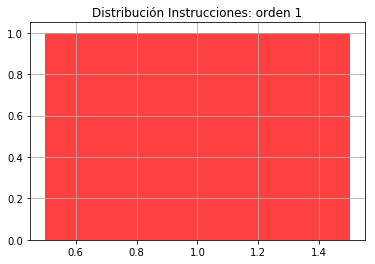

Comparaciones:
promedio: 0.000000, std: 0.000000


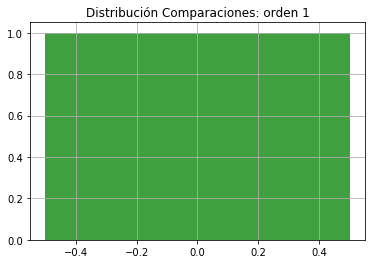

Intercambios:
promedio: 0.000000, std: 0.000000


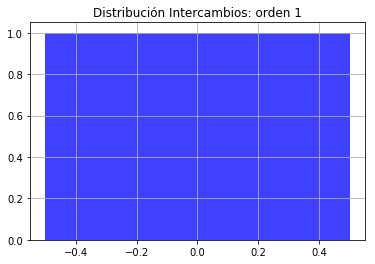

Preguntas:
promedio: 0.000000, std: 0.000000


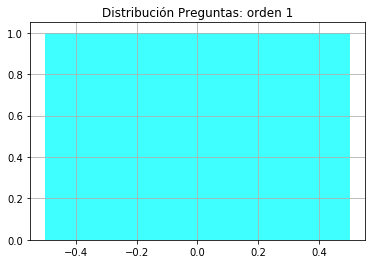

N: 2
Instrucciones:
promedio: 7.500000, std: 1.500000


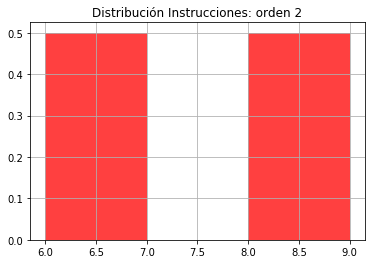

Comparaciones:
promedio: 1.500000, std: 0.500000


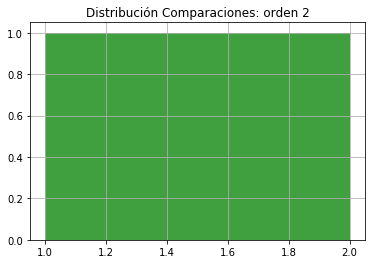

Intercambios:
promedio: 0.500000, std: 0.500000


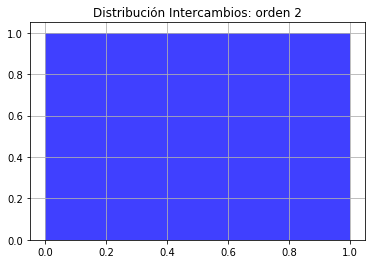

Preguntas:
promedio: 3.000000, std: 1.000000


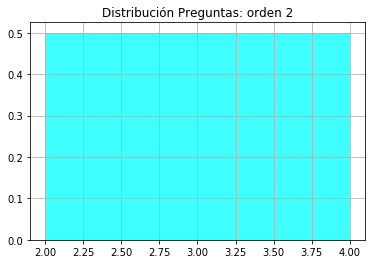

N: 3
Instrucciones:
promedio: 15.500000, std: 2.872281


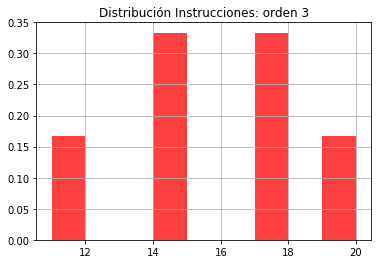

Comparaciones:
promedio: 3.500000, std: 0.957427


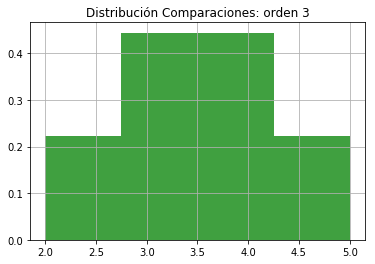

Intercambios:
promedio: 1.500000, std: 0.957427


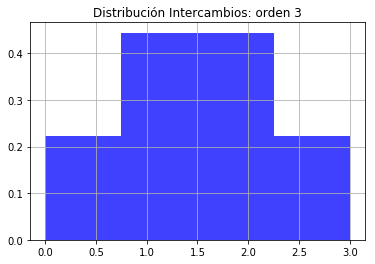

Preguntas:
promedio: 7.000000, std: 1.914854


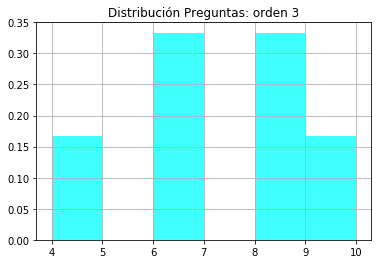

N: 4
Instrucciones:
promedio: 25.000000, std: 4.415880


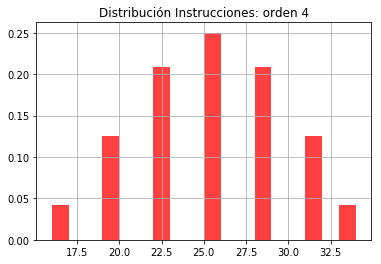

Comparaciones:
promedio: 6.000000, std: 1.471960


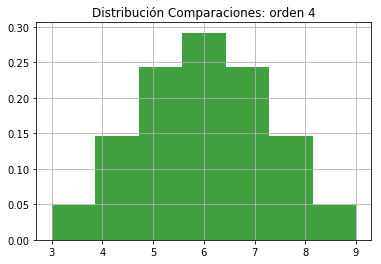

Intercambios:
promedio: 3.000000, std: 1.471960


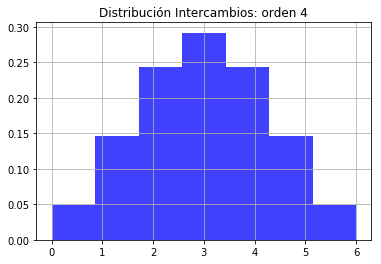

Preguntas:
promedio: 12.000000, std: 2.943920


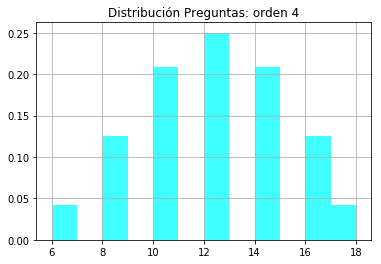

N: 5
Instrucciones:
promedio: 36.000000, std: 6.123724


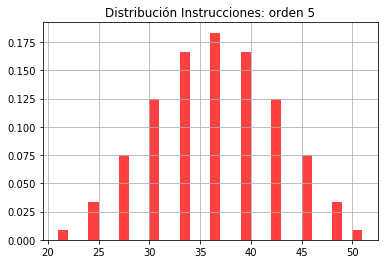

Comparaciones:
promedio: 9.000000, std: 2.041241


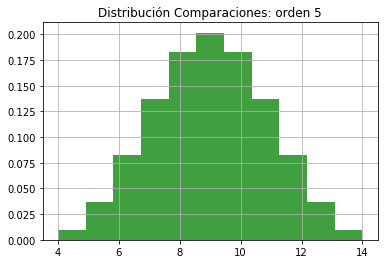

Intercambios:
promedio: 5.000000, std: 2.041241


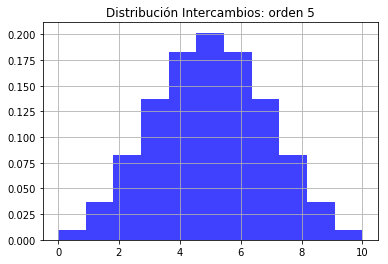

Preguntas:
promedio: 18.000000, std: 4.082483


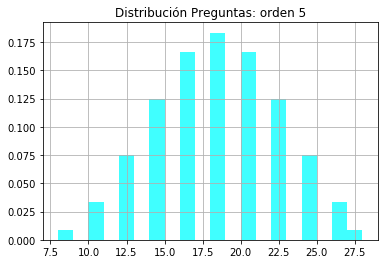

N: 6
Instrucciones:
promedio: 48.500000, std: 7.984360


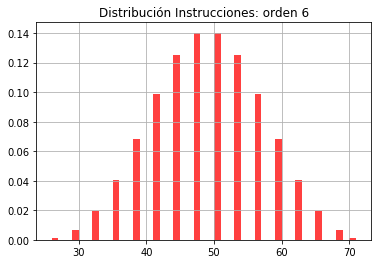

Comparaciones:
promedio: 12.500000, std: 2.661453


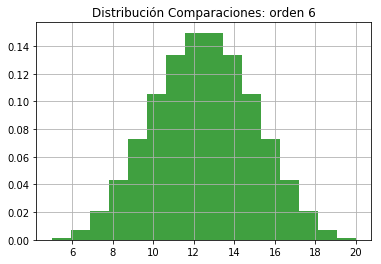

Intercambios:
promedio: 7.500000, std: 2.661453


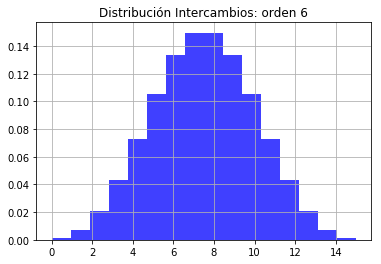

Preguntas:
promedio: 25.000000, std: 5.322906


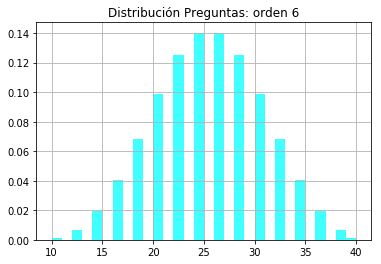

N: 7
Instrucciones:
promedio: 62.500000, std: 9.987492


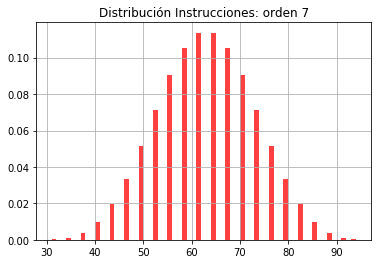

Comparaciones:
promedio: 16.500000, std: 3.329164


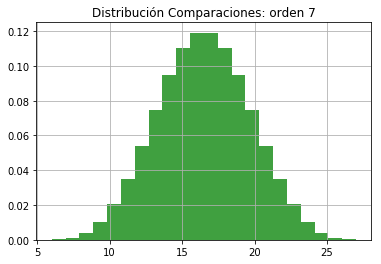

Intercambios:
promedio: 10.500000, std: 3.329164


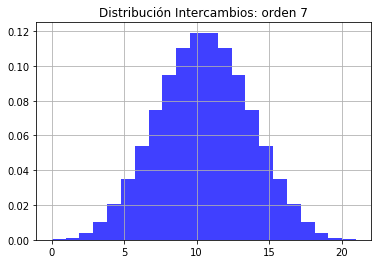

Preguntas:
promedio: 33.000000, std: 6.658328


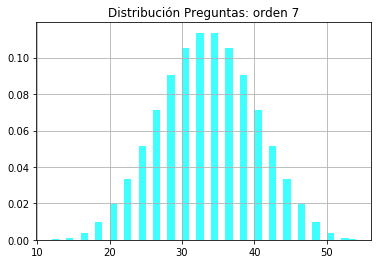

N: 8
Instrucciones:
promedio: 78.000000, std: 12.124356


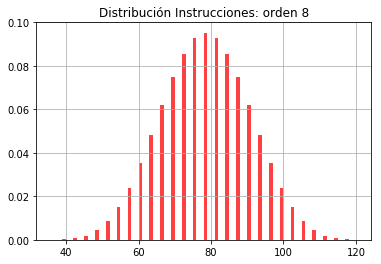

Comparaciones:
promedio: 21.000000, std: 4.041452


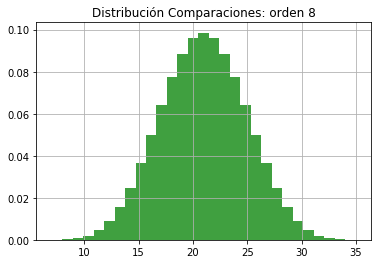

Intercambios:
promedio: 14.000000, std: 4.041452


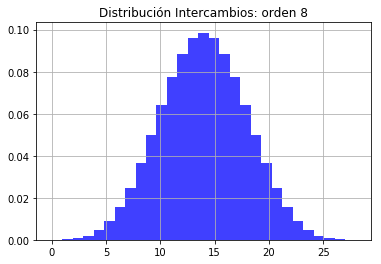

Preguntas:
promedio: 42.000000, std: 8.082904


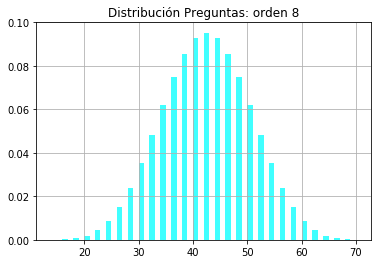

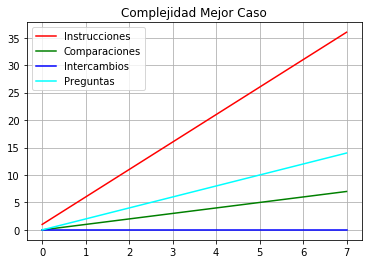

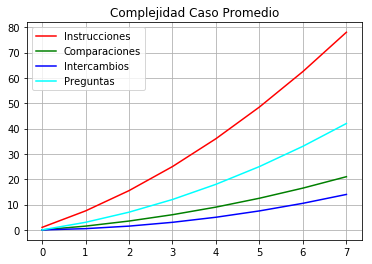

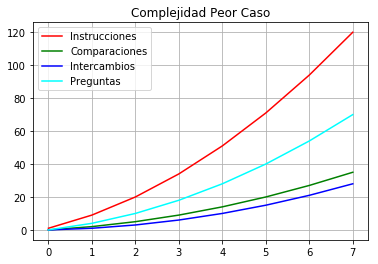

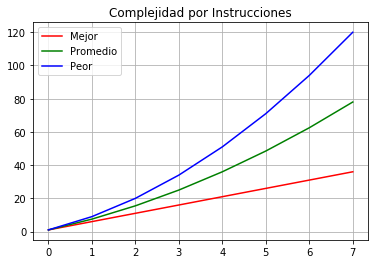

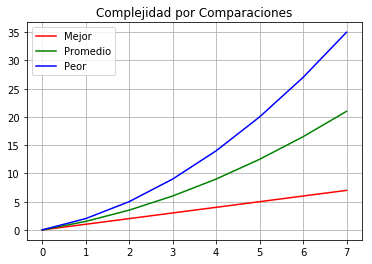

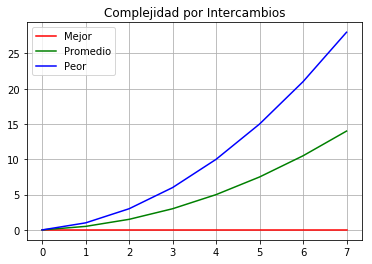

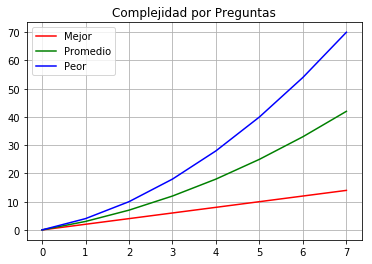

In [17]:
permutacionesItertools(8, DEBUG=False)

In [ ]:
permutacionesItertools(100)

N: 1
N: 2
N: 3
N: 4
N: 5
N: 6
N: 7
N: 8
N: 9
N: 10
N: 11


### Backup del Resultado
<img src="./img/memoria.PNG" alt="Maxima cantidad de iteraciones soportada por el computador." />

## Implementación usando el código de Daniel Jiménez

In [34]:
global cases
global npermut
cases = []
npermut = 0

'''
Función: Swap

Realizar un intercambio de dos elementos de un arreglo.
'''
def swap(arr, i, j):
    tmp = arr[i]
    arr[i] = arr[j]
    arr[j] = tmp

'''
Recursive function to generate permutations based on c code from Daniel Jimenez 
http://www.cs.rutgers.edu/~djimenez 
form his 1998 algorithms class at The University of Texas at San Antonio now his in Rutgers University 
and the code is available at 
http://camino.rutgers.edu/ut/utsa/cs3343/index.html 
in Lecture 25: Generating Permutations and Combinations
'''
def permitacionesDanielJimenez(arr, i, n):
    global cases
    global npermut
    if i == n:
        npermut += 1
        counter, v = insertionSort(arr)
        cases.append(counter)
    else:
        for j in range(i-1, n):
            swap(arr, i, j)
            permitacionesDanielJimenez(arr, i+1, n)
            swap(arr, i, j)

'''
Función: permutacionesDanielJimenez
@N: Máxima cantidad de elementos en arreglo a ordenar

Aplicar el algoritmo de Insertion Sort cada lista de permutaciones generada con el algoritmo de Daniel Jimenez.
'''
def permutacionesDanielJimenez(N, DEBUG=False):
    # Generar todas las posibles permutaciones que soporte la memoria
    instr_n, comps_n, inter_n, pregs_n = [], [], [], []
    cmplx_instr_n, cmplx_comps_n, cmplx_inter_n, cmplx_pregs_n = [], [], [], []
    for n in range(1, N+1):
        # Hallar el conjunto de posibles permitaciones con el algoritmo de Daniel Jimenez
        arr = np.arange(n-1, -1, -1)
        permitacionesDanielJimenez(arr, 1, n)
        print 'N: %d'%(n)
        # Ordenar mediante Insertion Sort y almacenar número de operaciones en función de la longitud del arreglo
        instr, comps, inter, pregs = [], [], [], []
        for counter in cases:
            instr.append(counter.instr)
            comps.append(counter.comps)
            inter.append(counter.inter)
            pregs.append(counter.pregs)
        # Almacenar resultados en función de N
        instr_n.append(instr), comps_n.append(comps), inter_n.append(inter), pregs_n.append(pregs)
        # Almacenar estadística en función de N
        cmplx_instr_n.append([instr[0], instr[-1], np.mean(instr), np.std(instr)])
        cmplx_comps_n.append([comps[0], comps[-1], np.mean(comps), np.std(comps)])
        cmplx_inter_n.append([inter[0], inter[-1], np.mean(inter), np.std(inter)]), 
        cmplx_pregs_n.append([pregs[0], pregs[-1], np.mean(pregs), np.std(pregs)])
        #if DEBUG:  
        plot_distribution('Instrucciones:', instr, cmplx_instr_n[n-1][2], cmplx_instr_n[n-1][3], n, 'red')
        plot_distribution('Comparaciones:', comps, cmplx_comps_n[n-1][2], cmplx_comps_n[n-1][3], n, 'green')
        plot_distribution('Intercambios:', inter, cmplx_inter_n[n-1][2], cmplx_inter_n[n-1][3], n, 'blue')
        plot_distribution('Preguntas:', pregs, cmplx_pregs_n[n-1][2], cmplx_pregs_n[n-1][3], n, 'cyan')
    #if DEBUG: 
    plot_complexity(cmplx_instr_n, cmplx_comps_n, cmplx_inter_n, cmplx_pregs_n)

N: 1
Instrucciones:
promedio: 1.000000, std: 0.000000


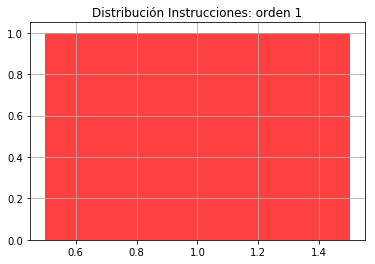

Comparaciones:
promedio: 0.000000, std: 0.000000


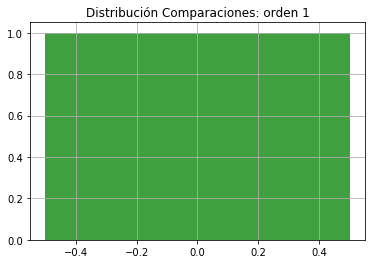

Intercambios:
promedio: 0.000000, std: 0.000000


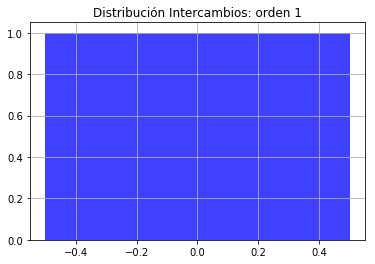

Preguntas:
promedio: 0.000000, std: 0.000000


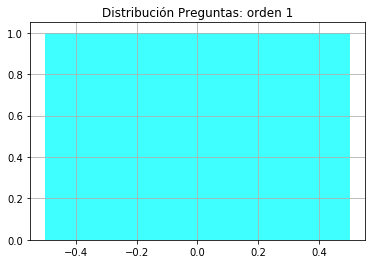

N: 2
Instrucciones:
promedio: 5.333333, std: 3.299832


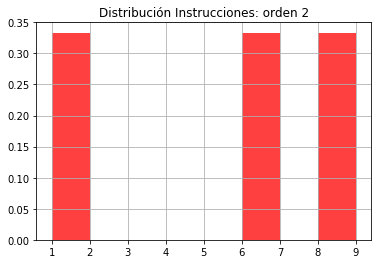

Comparaciones:
promedio: 1.000000, std: 0.816497


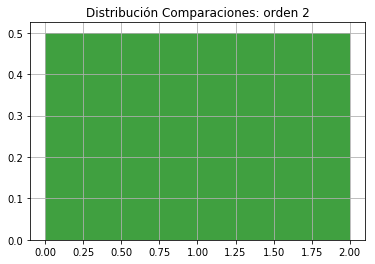

Intercambios:
promedio: 0.333333, std: 0.471405


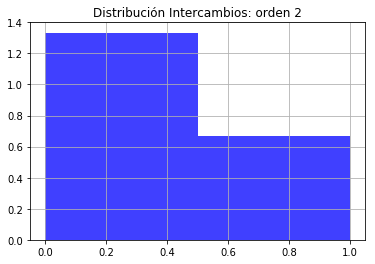

Preguntas:
promedio: 2.000000, std: 1.632993


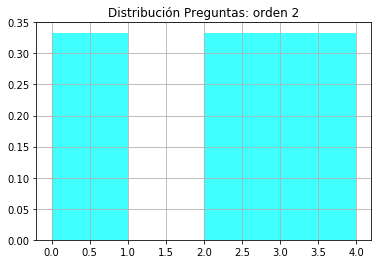

N: 3
Instrucciones:
promedio: 13.444444, std: 6.273597


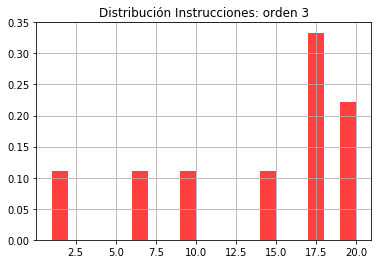

Comparaciones:
promedio: 3.111111, std: 1.662959


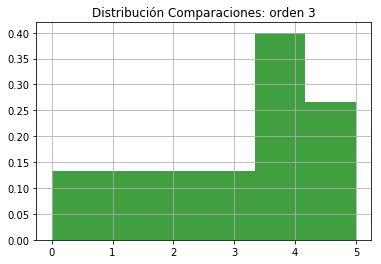

Intercambios:
promedio: 1.555556, std: 1.065740


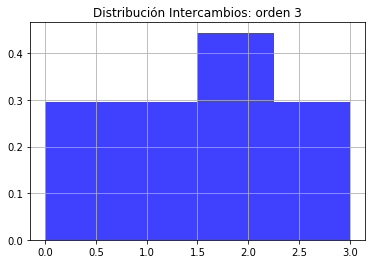

Preguntas:
promedio: 6.222222, std: 3.325918


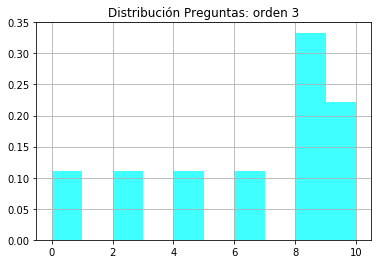

N: 4
Instrucciones:
promedio: 25.121212, std: 8.171486


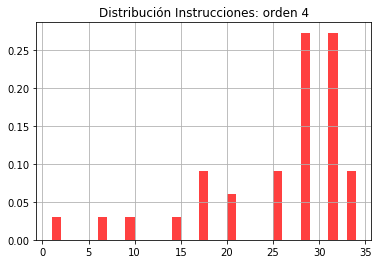

Comparaciones:
promedio: 6.303030, std: 2.262807


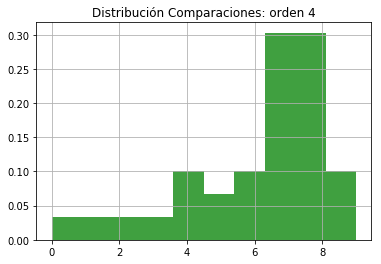

Intercambios:
promedio: 3.696970, std: 1.604631


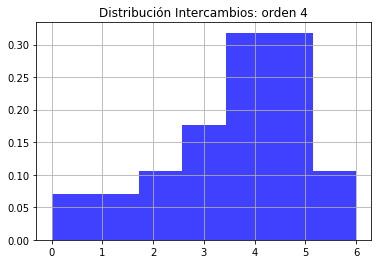

Preguntas:
promedio: 12.606061, std: 4.525613


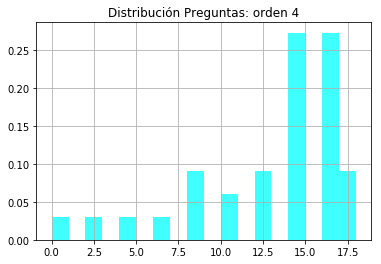

N: 5
Instrucciones:
promedio: 39.143791, std: 9.057852


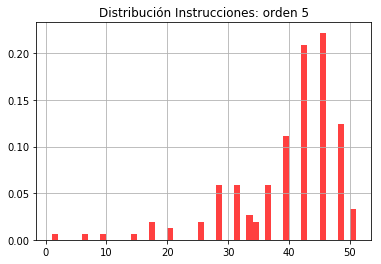

Comparaciones:
promedio: 10.248366, std: 2.625369


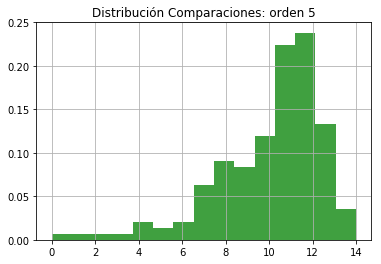

Intercambios:
promedio: 6.549020, std: 2.073616


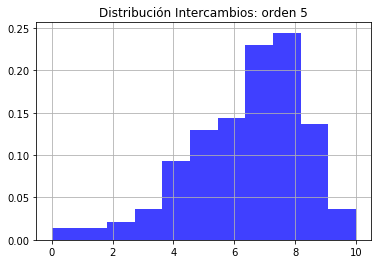

Preguntas:
promedio: 20.496732, std: 5.250738


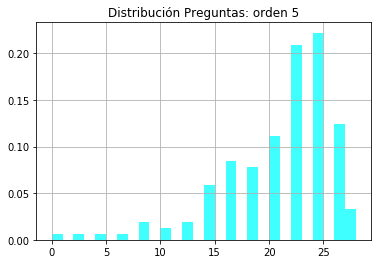

N: 6
Instrucciones:
promedio: 54.599084, std: 9.847618


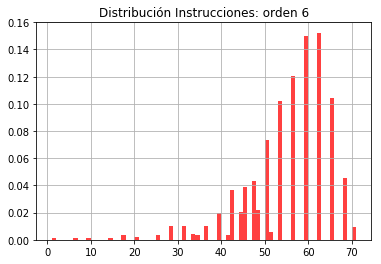

Comparaciones:
promedio: 14.684994, std: 2.988020


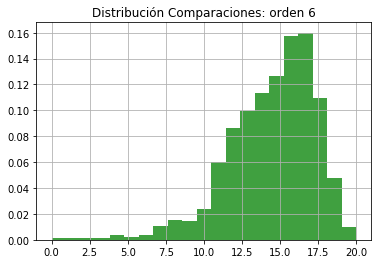

Intercambios:
promedio: 9.912944, std: 2.587613


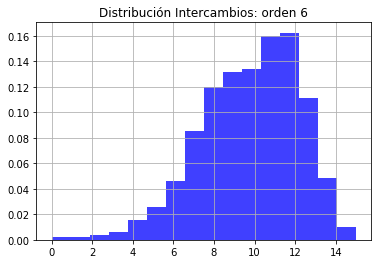

Preguntas:
promedio: 29.369989, std: 5.976040


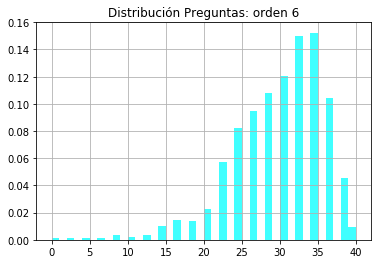

N: 7
Instrucciones:
promedio: 71.273634, std: 11.099395


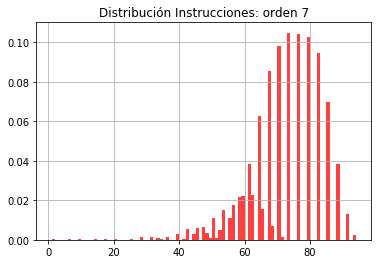

Comparaciones:
promedio: 19.545408, std: 3.486634


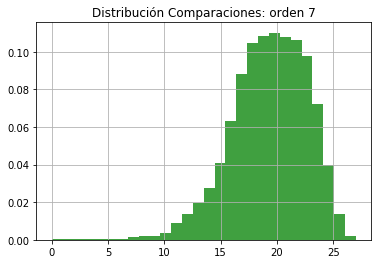

Intercambios:
promedio: 13.726704, std: 3.202251


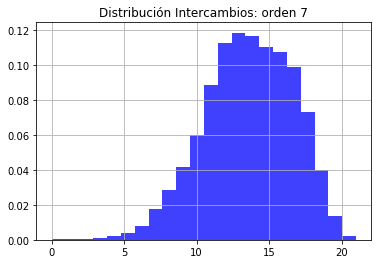

Preguntas:
promedio: 39.090817, std: 6.973267


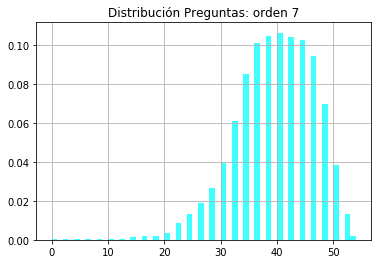

N: 8
Instrucciones:
promedio: 89.232648, std: 12.806111


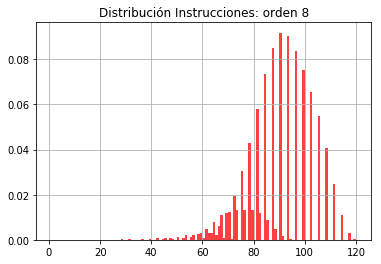

Comparaciones:
promedio: 24.844938, std: 4.109644


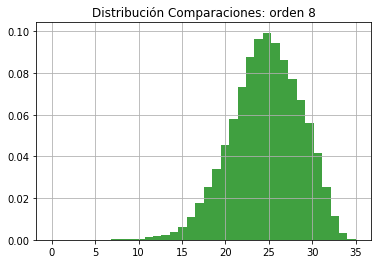

Intercambios:
promedio: 17.996020, std: 3.898745


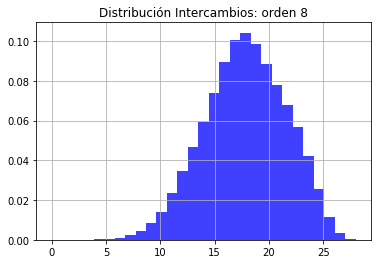

Preguntas:
promedio: 49.689875, std: 8.219289


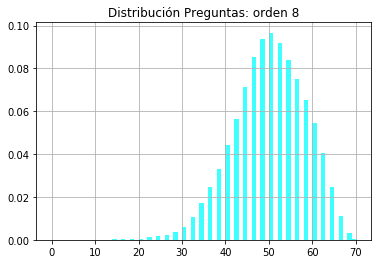

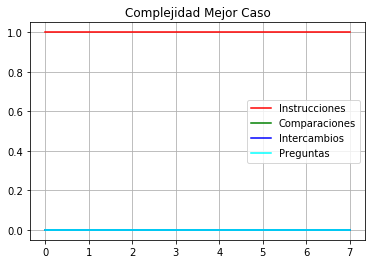

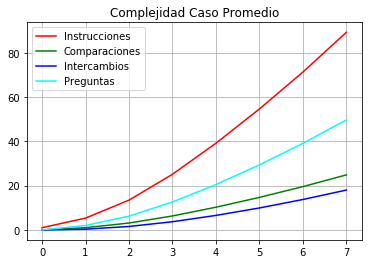

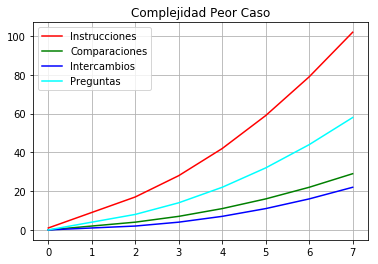

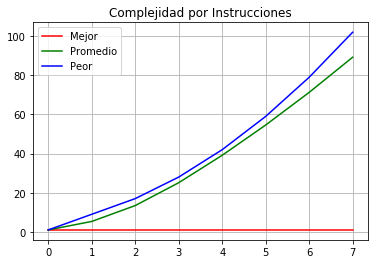

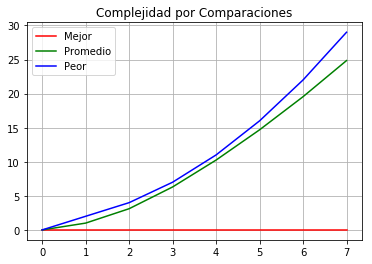

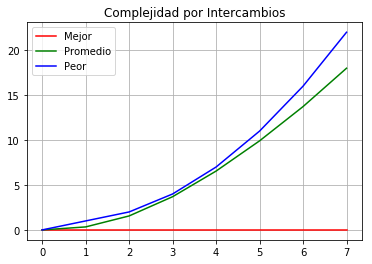

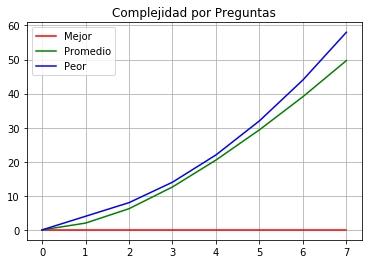

In [35]:
permutacionesDanielJimenez(8, DEBUG=False)

## Aplicación a una muestra aleatoria de permutaciones

In [36]:
def randomPerm(n):
    v=[]
    for i in range(n):
        v.append(i+1)
    for i in range(len(v)-1):
        j = random.randint(i, len(v)-1)
        aux = v[i]
        v[i] = v[j]
        v[j] = aux
    return v

def permutacionesAleatorias(n, runs):
    suma = 0
    mini = n**3
    maxi = 0
    for i in range(runs):
        counter, _ = insertionSort(randomPerm(n))
        if counter.instr < mini: mini = counter.instr
        if counter.instr > maxi: maxi = counter.instr
        suma = suma + counter.instr
        if DEBUG: counter.print_results()
    print '\nResultados:'
    print 'Theoretical best time, ' + str(5*n - 4) 
    print 'Theoretical worst time,' + str((3.0/2.0)*n**2 + (7.0/2.0)*n - 4)
    print 'Theoretical average time,' + str((3.0/4.0)*n**2 + (17.0/4.0)*n - 4)
    print 'Experimenal best time, ' + str(mini)
    print 'Experimenal worst time,' + str(maxi)
    print 'Experimenal average time,' + str(suma/runs)


In [37]:
permutacionesAleatorias(100, 10000)

instrucciones: 7138, comparaciones: 2313, intercambios: 2214, preguntas: 4626
instrucciones: 8923, comparaciones: 2908, intercambios: 2809, preguntas: 5816
instrucciones: 7762, comparaciones: 2521, intercambios: 2422, preguntas: 5042
instrucciones: 7717, comparaciones: 2506, intercambios: 2407, preguntas: 5012
instrucciones: 7873, comparaciones: 2558, intercambios: 2459, preguntas: 5116
instrucciones: 7687, comparaciones: 2496, intercambios: 2397, preguntas: 4992
instrucciones: 8416, comparaciones: 2739, intercambios: 2640, preguntas: 5478
instrucciones: 8098, comparaciones: 2633, intercambios: 2534, preguntas: 5266
instrucciones: 7033, comparaciones: 2278, intercambios: 2179, preguntas: 4556
instrucciones: 7279, comparaciones: 2360, intercambios: 2261, preguntas: 4720
instrucciones: 8296, comparaciones: 2699, intercambios: 2600, preguntas: 5398
instrucciones: 8500, comparaciones: 2767, intercambios: 2668, preguntas: 5534
instrucciones: 8134, comparaciones: 2645, intercambios: 2546, pr

instrucciones: 7534, comparaciones: 2445, intercambios: 2346, preguntas: 4890
instrucciones: 7927, comparaciones: 2576, intercambios: 2477, preguntas: 5152
instrucciones: 7681, comparaciones: 2494, intercambios: 2395, preguntas: 4988
instrucciones: 7957, comparaciones: 2586, intercambios: 2487, preguntas: 5172
instrucciones: 8224, comparaciones: 2675, intercambios: 2576, preguntas: 5350
instrucciones: 8413, comparaciones: 2738, intercambios: 2639, preguntas: 5476
instrucciones: 7903, comparaciones: 2568, intercambios: 2469, preguntas: 5136
instrucciones: 7906, comparaciones: 2569, intercambios: 2470, preguntas: 5138
instrucciones: 7894, comparaciones: 2565, intercambios: 2466, preguntas: 5130
instrucciones: 7957, comparaciones: 2586, intercambios: 2487, preguntas: 5172
instrucciones: 7861, comparaciones: 2554, intercambios: 2455, preguntas: 5108
instrucciones: 8575, comparaciones: 2792, intercambios: 2693, preguntas: 5584
instrucciones: 8329, comparaciones: 2710, intercambios: 2611, pr

instrucciones: 8416, comparaciones: 2739, intercambios: 2640, preguntas: 5478
instrucciones: 8395, comparaciones: 2732, intercambios: 2633, preguntas: 5464
instrucciones: 7552, comparaciones: 2451, intercambios: 2352, preguntas: 4902
instrucciones: 6904, comparaciones: 2235, intercambios: 2136, preguntas: 4470
instrucciones: 6838, comparaciones: 2213, intercambios: 2114, preguntas: 4426
instrucciones: 7606, comparaciones: 2469, intercambios: 2370, preguntas: 4938
instrucciones: 7918, comparaciones: 2573, intercambios: 2474, preguntas: 5146
instrucciones: 8005, comparaciones: 2602, intercambios: 2503, preguntas: 5204
instrucciones: 7048, comparaciones: 2283, intercambios: 2184, preguntas: 4566
instrucciones: 8191, comparaciones: 2664, intercambios: 2565, preguntas: 5328
instrucciones: 8287, comparaciones: 2696, intercambios: 2597, preguntas: 5392
instrucciones: 7831, comparaciones: 2544, intercambios: 2445, preguntas: 5088
instrucciones: 7393, comparaciones: 2398, intercambios: 2299, pr

instrucciones: 7744, comparaciones: 2515, intercambios: 2416, preguntas: 5030
instrucciones: 7624, comparaciones: 2475, intercambios: 2376, preguntas: 4950
instrucciones: 8419, comparaciones: 2740, intercambios: 2641, preguntas: 5480
instrucciones: 8842, comparaciones: 2881, intercambios: 2782, preguntas: 5762
instrucciones: 6550, comparaciones: 2117, intercambios: 2018, preguntas: 4234
instrucciones: 8002, comparaciones: 2601, intercambios: 2502, preguntas: 5202
instrucciones: 7495, comparaciones: 2432, intercambios: 2333, preguntas: 4864
instrucciones: 7993, comparaciones: 2598, intercambios: 2499, preguntas: 5196
instrucciones: 7981, comparaciones: 2594, intercambios: 2495, preguntas: 5188
instrucciones: 8422, comparaciones: 2741, intercambios: 2642, preguntas: 5482
instrucciones: 8974, comparaciones: 2925, intercambios: 2826, preguntas: 5850
instrucciones: 8389, comparaciones: 2730, intercambios: 2631, preguntas: 5460
instrucciones: 8551, comparaciones: 2784, intercambios: 2685, pr

instrucciones: 8326, comparaciones: 2709, intercambios: 2610, preguntas: 5418
instrucciones: 7312, comparaciones: 2371, intercambios: 2272, preguntas: 4742
instrucciones: 8188, comparaciones: 2663, intercambios: 2564, preguntas: 5326
instrucciones: 7816, comparaciones: 2539, intercambios: 2440, preguntas: 5078
instrucciones: 8176, comparaciones: 2659, intercambios: 2560, preguntas: 5318
instrucciones: 8467, comparaciones: 2756, intercambios: 2657, preguntas: 5512
instrucciones: 7978, comparaciones: 2593, intercambios: 2494, preguntas: 5186
instrucciones: 8914, comparaciones: 2905, intercambios: 2806, preguntas: 5810
instrucciones: 8668, comparaciones: 2823, intercambios: 2724, preguntas: 5646
instrucciones: 7639, comparaciones: 2480, intercambios: 2381, preguntas: 4960
instrucciones: 8518, comparaciones: 2773, intercambios: 2674, preguntas: 5546
instrucciones: 8599, comparaciones: 2800, intercambios: 2701, preguntas: 5600
instrucciones: 8290, comparaciones: 2697, intercambios: 2598, pr

instrucciones: 7519, comparaciones: 2440, intercambios: 2341, preguntas: 4880
instrucciones: 8014, comparaciones: 2605, intercambios: 2506, preguntas: 5210
instrucciones: 7873, comparaciones: 2558, intercambios: 2459, preguntas: 5116
instrucciones: 8395, comparaciones: 2732, intercambios: 2633, preguntas: 5464
instrucciones: 7849, comparaciones: 2550, intercambios: 2451, preguntas: 5100
instrucciones: 8620, comparaciones: 2807, intercambios: 2708, preguntas: 5614
instrucciones: 7540, comparaciones: 2447, intercambios: 2348, preguntas: 4894
instrucciones: 7210, comparaciones: 2337, intercambios: 2238, preguntas: 4674
instrucciones: 8278, comparaciones: 2693, intercambios: 2594, preguntas: 5386
instrucciones: 7939, comparaciones: 2580, intercambios: 2481, preguntas: 5160
instrucciones: 8167, comparaciones: 2656, intercambios: 2557, preguntas: 5312
instrucciones: 8485, comparaciones: 2762, intercambios: 2663, preguntas: 5524
instrucciones: 8695, comparaciones: 2832, intercambios: 2733, pr

instrucciones: 7960, comparaciones: 2587, intercambios: 2488, preguntas: 5174
instrucciones: 8131, comparaciones: 2644, intercambios: 2545, preguntas: 5288
instrucciones: 7423, comparaciones: 2408, intercambios: 2309, preguntas: 4816
instrucciones: 7837, comparaciones: 2546, intercambios: 2447, preguntas: 5092
instrucciones: 7852, comparaciones: 2551, intercambios: 2452, preguntas: 5102
instrucciones: 8062, comparaciones: 2621, intercambios: 2522, preguntas: 5242
instrucciones: 8011, comparaciones: 2604, intercambios: 2505, preguntas: 5208
instrucciones: 7942, comparaciones: 2581, intercambios: 2482, preguntas: 5162
instrucciones: 7594, comparaciones: 2465, intercambios: 2366, preguntas: 4930
instrucciones: 7681, comparaciones: 2494, intercambios: 2395, preguntas: 4988
instrucciones: 6850, comparaciones: 2217, intercambios: 2118, preguntas: 4434
instrucciones: 7771, comparaciones: 2524, intercambios: 2425, preguntas: 5048
instrucciones: 8149, comparaciones: 2650, intercambios: 2551, pr

instrucciones: 8284, comparaciones: 2695, intercambios: 2596, preguntas: 5390
instrucciones: 7771, comparaciones: 2524, intercambios: 2425, preguntas: 5048
instrucciones: 7522, comparaciones: 2441, intercambios: 2342, preguntas: 4882
instrucciones: 7390, comparaciones: 2397, intercambios: 2298, preguntas: 4794
instrucciones: 7897, comparaciones: 2566, intercambios: 2467, preguntas: 5132
instrucciones: 7672, comparaciones: 2491, intercambios: 2392, preguntas: 4982
instrucciones: 7387, comparaciones: 2396, intercambios: 2297, preguntas: 4792
instrucciones: 8332, comparaciones: 2711, intercambios: 2612, preguntas: 5422
instrucciones: 7471, comparaciones: 2424, intercambios: 2325, preguntas: 4848
instrucciones: 8806, comparaciones: 2869, intercambios: 2770, preguntas: 5738
instrucciones: 7774, comparaciones: 2525, intercambios: 2426, preguntas: 5050
instrucciones: 7468, comparaciones: 2423, intercambios: 2324, preguntas: 4846
instrucciones: 8656, comparaciones: 2819, intercambios: 2720, pr

instrucciones: 8284, comparaciones: 2695, intercambios: 2596, preguntas: 5390
instrucciones: 7114, comparaciones: 2305, intercambios: 2206, preguntas: 4610
instrucciones: 7402, comparaciones: 2401, intercambios: 2302, preguntas: 4802
instrucciones: 8560, comparaciones: 2787, intercambios: 2688, preguntas: 5574
instrucciones: 7558, comparaciones: 2453, intercambios: 2354, preguntas: 4906
instrucciones: 8137, comparaciones: 2646, intercambios: 2547, preguntas: 5292
instrucciones: 7993, comparaciones: 2598, intercambios: 2499, preguntas: 5196
instrucciones: 7120, comparaciones: 2307, intercambios: 2208, preguntas: 4614
instrucciones: 7762, comparaciones: 2521, intercambios: 2422, preguntas: 5042
instrucciones: 8635, comparaciones: 2812, intercambios: 2713, preguntas: 5624
instrucciones: 7978, comparaciones: 2593, intercambios: 2494, preguntas: 5186
instrucciones: 7483, comparaciones: 2428, intercambios: 2329, preguntas: 4856
instrucciones: 8587, comparaciones: 2796, intercambios: 2697, pr

instrucciones: 7996, comparaciones: 2599, intercambios: 2500, preguntas: 5198
instrucciones: 7789, comparaciones: 2530, intercambios: 2431, preguntas: 5060
instrucciones: 7831, comparaciones: 2544, intercambios: 2445, preguntas: 5088
instrucciones: 7264, comparaciones: 2355, intercambios: 2256, preguntas: 4710
instrucciones: 8791, comparaciones: 2864, intercambios: 2765, preguntas: 5728
instrucciones: 6724, comparaciones: 2175, intercambios: 2076, preguntas: 4350
instrucciones: 7333, comparaciones: 2378, intercambios: 2279, preguntas: 4756
instrucciones: 8188, comparaciones: 2663, intercambios: 2564, preguntas: 5326
instrucciones: 7429, comparaciones: 2410, intercambios: 2311, preguntas: 4820
instrucciones: 7684, comparaciones: 2495, intercambios: 2396, preguntas: 4990
instrucciones: 7954, comparaciones: 2585, intercambios: 2486, preguntas: 5170
instrucciones: 7525, comparaciones: 2442, intercambios: 2343, preguntas: 4884
instrucciones: 7390, comparaciones: 2397, intercambios: 2298, pr

instrucciones: 8557, comparaciones: 2786, intercambios: 2687, preguntas: 5572
instrucciones: 7984, comparaciones: 2595, intercambios: 2496, preguntas: 5190
instrucciones: 7732, comparaciones: 2511, intercambios: 2412, preguntas: 5022
instrucciones: 8173, comparaciones: 2658, intercambios: 2559, preguntas: 5316
instrucciones: 7537, comparaciones: 2446, intercambios: 2347, preguntas: 4892
instrucciones: 7057, comparaciones: 2286, intercambios: 2187, preguntas: 4572
instrucciones: 7864, comparaciones: 2555, intercambios: 2456, preguntas: 5110
instrucciones: 7615, comparaciones: 2472, intercambios: 2373, preguntas: 4944
instrucciones: 7519, comparaciones: 2440, intercambios: 2341, preguntas: 4880
instrucciones: 8467, comparaciones: 2756, intercambios: 2657, preguntas: 5512
instrucciones: 7768, comparaciones: 2523, intercambios: 2424, preguntas: 5046
instrucciones: 7729, comparaciones: 2510, intercambios: 2411, preguntas: 5020
instrucciones: 7024, comparaciones: 2275, intercambios: 2176, pr

instrucciones: 7978, comparaciones: 2593, intercambios: 2494, preguntas: 5186
instrucciones: 8413, comparaciones: 2738, intercambios: 2639, preguntas: 5476
instrucciones: 8074, comparaciones: 2625, intercambios: 2526, preguntas: 5250
instrucciones: 8857, comparaciones: 2886, intercambios: 2787, preguntas: 5772
instrucciones: 8620, comparaciones: 2807, intercambios: 2708, preguntas: 5614
instrucciones: 7261, comparaciones: 2354, intercambios: 2255, preguntas: 4708
instrucciones: 7354, comparaciones: 2385, intercambios: 2286, preguntas: 4770
instrucciones: 8002, comparaciones: 2601, intercambios: 2502, preguntas: 5202
instrucciones: 7894, comparaciones: 2565, intercambios: 2466, preguntas: 5130
instrucciones: 7729, comparaciones: 2510, intercambios: 2411, preguntas: 5020
instrucciones: 8401, comparaciones: 2734, intercambios: 2635, preguntas: 5468
instrucciones: 8296, comparaciones: 2699, intercambios: 2600, preguntas: 5398
instrucciones: 8110, comparaciones: 2637, intercambios: 2538, pr

instrucciones: 8011, comparaciones: 2604, intercambios: 2505, preguntas: 5208
instrucciones: 6598, comparaciones: 2133, intercambios: 2034, preguntas: 4266
instrucciones: 8470, comparaciones: 2757, intercambios: 2658, preguntas: 5514
instrucciones: 8017, comparaciones: 2606, intercambios: 2507, preguntas: 5212
instrucciones: 7810, comparaciones: 2537, intercambios: 2438, preguntas: 5074
instrucciones: 7954, comparaciones: 2585, intercambios: 2486, preguntas: 5170
instrucciones: 7990, comparaciones: 2597, intercambios: 2498, preguntas: 5194
instrucciones: 7108, comparaciones: 2303, intercambios: 2204, preguntas: 4606
instrucciones: 7945, comparaciones: 2582, intercambios: 2483, preguntas: 5164
instrucciones: 6943, comparaciones: 2248, intercambios: 2149, preguntas: 4496
instrucciones: 8428, comparaciones: 2743, intercambios: 2644, preguntas: 5486
instrucciones: 9034, comparaciones: 2945, intercambios: 2846, preguntas: 5890
instrucciones: 8098, comparaciones: 2633, intercambios: 2534, pr

instrucciones: 8377, comparaciones: 2726, intercambios: 2627, preguntas: 5452
instrucciones: 7990, comparaciones: 2597, intercambios: 2498, preguntas: 5194
instrucciones: 8365, comparaciones: 2722, intercambios: 2623, preguntas: 5444
instrucciones: 8035, comparaciones: 2612, intercambios: 2513, preguntas: 5224
instrucciones: 7987, comparaciones: 2596, intercambios: 2497, preguntas: 5192
instrucciones: 8611, comparaciones: 2804, intercambios: 2705, preguntas: 5608
instrucciones: 7312, comparaciones: 2371, intercambios: 2272, preguntas: 4742
instrucciones: 7681, comparaciones: 2494, intercambios: 2395, preguntas: 4988
instrucciones: 8977, comparaciones: 2926, intercambios: 2827, preguntas: 5852
instrucciones: 8368, comparaciones: 2723, intercambios: 2624, preguntas: 5446
instrucciones: 8026, comparaciones: 2609, intercambios: 2510, preguntas: 5218
instrucciones: 8998, comparaciones: 2933, intercambios: 2834, preguntas: 5866
instrucciones: 7861, comparaciones: 2554, intercambios: 2455, pr

instrucciones: 8401, comparaciones: 2734, intercambios: 2635, preguntas: 5468
instrucciones: 7735, comparaciones: 2512, intercambios: 2413, preguntas: 5024
instrucciones: 8038, comparaciones: 2613, intercambios: 2514, preguntas: 5226
instrucciones: 7972, comparaciones: 2591, intercambios: 2492, preguntas: 5182
instrucciones: 7639, comparaciones: 2480, intercambios: 2381, preguntas: 4960
instrucciones: 8293, comparaciones: 2698, intercambios: 2599, preguntas: 5396
instrucciones: 8251, comparaciones: 2684, intercambios: 2585, preguntas: 5368
instrucciones: 8233, comparaciones: 2678, intercambios: 2579, preguntas: 5356
instrucciones: 7273, comparaciones: 2358, intercambios: 2259, preguntas: 4716
instrucciones: 7318, comparaciones: 2373, intercambios: 2274, preguntas: 4746
instrucciones: 7930, comparaciones: 2577, intercambios: 2478, preguntas: 5154
instrucciones: 7447, comparaciones: 2416, intercambios: 2317, preguntas: 4832
instrucciones: 7291, comparaciones: 2364, intercambios: 2265, pr

instrucciones: 8443, comparaciones: 2748, intercambios: 2649, preguntas: 5496
instrucciones: 6532, comparaciones: 2111, intercambios: 2012, preguntas: 4222
instrucciones: 7957, comparaciones: 2586, intercambios: 2487, preguntas: 5172
instrucciones: 7816, comparaciones: 2539, intercambios: 2440, preguntas: 5078
instrucciones: 7972, comparaciones: 2591, intercambios: 2492, preguntas: 5182
instrucciones: 8326, comparaciones: 2709, intercambios: 2610, preguntas: 5418
instrucciones: 7414, comparaciones: 2405, intercambios: 2306, preguntas: 4810
instrucciones: 7543, comparaciones: 2448, intercambios: 2349, preguntas: 4896
instrucciones: 7747, comparaciones: 2516, intercambios: 2417, preguntas: 5032
instrucciones: 7795, comparaciones: 2532, intercambios: 2433, preguntas: 5064
instrucciones: 8149, comparaciones: 2650, intercambios: 2551, preguntas: 5300
instrucciones: 7591, comparaciones: 2464, intercambios: 2365, preguntas: 4928
instrucciones: 7894, comparaciones: 2565, intercambios: 2466, pr

instrucciones: 6847, comparaciones: 2216, intercambios: 2117, preguntas: 4432
instrucciones: 7666, comparaciones: 2489, intercambios: 2390, preguntas: 4978
instrucciones: 7045, comparaciones: 2282, intercambios: 2183, preguntas: 4564
instrucciones: 8536, comparaciones: 2779, intercambios: 2680, preguntas: 5558
instrucciones: 8689, comparaciones: 2830, intercambios: 2731, preguntas: 5660
instrucciones: 7393, comparaciones: 2398, intercambios: 2299, preguntas: 4796
instrucciones: 7021, comparaciones: 2274, intercambios: 2175, preguntas: 4548
instrucciones: 8293, comparaciones: 2698, intercambios: 2599, preguntas: 5396
instrucciones: 7681, comparaciones: 2494, intercambios: 2395, preguntas: 4988
instrucciones: 8074, comparaciones: 2625, intercambios: 2526, preguntas: 5250
instrucciones: 7792, comparaciones: 2531, intercambios: 2432, preguntas: 5062
instrucciones: 7528, comparaciones: 2443, intercambios: 2344, preguntas: 4886
instrucciones: 8557, comparaciones: 2786, intercambios: 2687, pr

instrucciones: 6859, comparaciones: 2220, intercambios: 2121, preguntas: 4440
instrucciones: 7873, comparaciones: 2558, intercambios: 2459, preguntas: 5116
instrucciones: 7912, comparaciones: 2571, intercambios: 2472, preguntas: 5142
instrucciones: 7783, comparaciones: 2528, intercambios: 2429, preguntas: 5056
instrucciones: 7423, comparaciones: 2408, intercambios: 2309, preguntas: 4816
instrucciones: 7672, comparaciones: 2491, intercambios: 2392, preguntas: 4982
instrucciones: 7531, comparaciones: 2444, intercambios: 2345, preguntas: 4888
instrucciones: 7357, comparaciones: 2386, intercambios: 2287, preguntas: 4772
instrucciones: 8173, comparaciones: 2658, intercambios: 2559, preguntas: 5316
instrucciones: 8596, comparaciones: 2799, intercambios: 2700, preguntas: 5598
instrucciones: 7294, comparaciones: 2365, intercambios: 2266, preguntas: 4730
instrucciones: 7795, comparaciones: 2532, intercambios: 2433, preguntas: 5064
instrucciones: 8290, comparaciones: 2697, intercambios: 2598, pr

instrucciones: 8038, comparaciones: 2613, intercambios: 2514, preguntas: 5226
instrucciones: 8362, comparaciones: 2721, intercambios: 2622, preguntas: 5442
instrucciones: 7558, comparaciones: 2453, intercambios: 2354, preguntas: 4906
instrucciones: 8743, comparaciones: 2848, intercambios: 2749, preguntas: 5696
instrucciones: 7915, comparaciones: 2572, intercambios: 2473, preguntas: 5144
instrucciones: 6910, comparaciones: 2237, intercambios: 2138, preguntas: 4474
instrucciones: 8014, comparaciones: 2605, intercambios: 2506, preguntas: 5210
instrucciones: 8233, comparaciones: 2678, intercambios: 2579, preguntas: 5356
instrucciones: 6823, comparaciones: 2208, intercambios: 2109, preguntas: 4416
instrucciones: 7429, comparaciones: 2410, intercambios: 2311, preguntas: 4820
instrucciones: 8119, comparaciones: 2640, intercambios: 2541, preguntas: 5280
instrucciones: 7234, comparaciones: 2345, intercambios: 2246, preguntas: 4690
instrucciones: 8605, comparaciones: 2802, intercambios: 2703, pr

instrucciones: 8050, comparaciones: 2617, intercambios: 2518, preguntas: 5234
instrucciones: 7453, comparaciones: 2418, intercambios: 2319, preguntas: 4836
instrucciones: 7687, comparaciones: 2496, intercambios: 2397, preguntas: 4992
instrucciones: 8029, comparaciones: 2610, intercambios: 2511, preguntas: 5220
instrucciones: 8386, comparaciones: 2729, intercambios: 2630, preguntas: 5458
instrucciones: 8176, comparaciones: 2659, intercambios: 2560, preguntas: 5318
instrucciones: 8338, comparaciones: 2713, intercambios: 2614, preguntas: 5426
instrucciones: 7045, comparaciones: 2282, intercambios: 2183, preguntas: 4564
instrucciones: 7450, comparaciones: 2417, intercambios: 2318, preguntas: 4834
instrucciones: 7978, comparaciones: 2593, intercambios: 2494, preguntas: 5186
instrucciones: 7789, comparaciones: 2530, intercambios: 2431, preguntas: 5060
instrucciones: 7387, comparaciones: 2396, intercambios: 2297, preguntas: 4792
instrucciones: 7876, comparaciones: 2559, intercambios: 2460, pr

instrucciones: 8497, comparaciones: 2766, intercambios: 2667, preguntas: 5532
instrucciones: 7930, comparaciones: 2577, intercambios: 2478, preguntas: 5154
instrucciones: 7894, comparaciones: 2565, intercambios: 2466, preguntas: 5130
instrucciones: 7126, comparaciones: 2309, intercambios: 2210, preguntas: 4618
instrucciones: 8344, comparaciones: 2715, intercambios: 2616, preguntas: 5430
instrucciones: 8566, comparaciones: 2789, intercambios: 2690, preguntas: 5578
instrucciones: 7375, comparaciones: 2392, intercambios: 2293, preguntas: 4784
instrucciones: 8008, comparaciones: 2603, intercambios: 2504, preguntas: 5206
instrucciones: 7672, comparaciones: 2491, intercambios: 2392, preguntas: 4982
instrucciones: 7168, comparaciones: 2323, intercambios: 2224, preguntas: 4646
instrucciones: 7618, comparaciones: 2473, intercambios: 2374, preguntas: 4946
instrucciones: 8284, comparaciones: 2695, intercambios: 2596, preguntas: 5390
instrucciones: 7489, comparaciones: 2430, intercambios: 2331, pr

instrucciones: 7957, comparaciones: 2586, intercambios: 2487, preguntas: 5172
instrucciones: 7507, comparaciones: 2436, intercambios: 2337, preguntas: 4872
instrucciones: 7567, comparaciones: 2456, intercambios: 2357, preguntas: 4912
instrucciones: 7732, comparaciones: 2511, intercambios: 2412, preguntas: 5022
instrucciones: 7546, comparaciones: 2449, intercambios: 2350, preguntas: 4898
instrucciones: 8302, comparaciones: 2701, intercambios: 2602, preguntas: 5402
instrucciones: 7618, comparaciones: 2473, intercambios: 2374, preguntas: 4946
instrucciones: 6763, comparaciones: 2188, intercambios: 2089, preguntas: 4376
instrucciones: 8374, comparaciones: 2725, intercambios: 2626, preguntas: 5450
instrucciones: 8245, comparaciones: 2682, intercambios: 2583, preguntas: 5364
instrucciones: 7585, comparaciones: 2462, intercambios: 2363, preguntas: 4924
instrucciones: 7507, comparaciones: 2436, intercambios: 2337, preguntas: 4872
instrucciones: 8626, comparaciones: 2809, intercambios: 2710, pr

instrucciones: 7951, comparaciones: 2584, intercambios: 2485, preguntas: 5168
instrucciones: 7675, comparaciones: 2492, intercambios: 2393, preguntas: 4984
instrucciones: 9007, comparaciones: 2936, intercambios: 2837, preguntas: 5872
instrucciones: 8365, comparaciones: 2722, intercambios: 2623, preguntas: 5444
instrucciones: 8473, comparaciones: 2758, intercambios: 2659, preguntas: 5516
instrucciones: 7687, comparaciones: 2496, intercambios: 2397, preguntas: 4992
instrucciones: 8473, comparaciones: 2758, intercambios: 2659, preguntas: 5516
instrucciones: 7978, comparaciones: 2593, intercambios: 2494, preguntas: 5186
instrucciones: 8503, comparaciones: 2768, intercambios: 2669, preguntas: 5536
instrucciones: 8095, comparaciones: 2632, intercambios: 2533, preguntas: 5264
instrucciones: 7153, comparaciones: 2318, intercambios: 2219, preguntas: 4636
instrucciones: 7681, comparaciones: 2494, intercambios: 2395, preguntas: 4988
instrucciones: 8107, comparaciones: 2636, intercambios: 2537, pr

instrucciones: 8017, comparaciones: 2606, intercambios: 2507, preguntas: 5212
instrucciones: 8743, comparaciones: 2848, intercambios: 2749, preguntas: 5696
instrucciones: 7933, comparaciones: 2578, intercambios: 2479, preguntas: 5156
instrucciones: 7123, comparaciones: 2308, intercambios: 2209, preguntas: 4616
instrucciones: 7384, comparaciones: 2395, intercambios: 2296, preguntas: 4790
instrucciones: 7909, comparaciones: 2570, intercambios: 2471, preguntas: 5140
instrucciones: 8578, comparaciones: 2793, intercambios: 2694, preguntas: 5586
instrucciones: 8158, comparaciones: 2653, intercambios: 2554, preguntas: 5306
instrucciones: 8065, comparaciones: 2622, intercambios: 2523, preguntas: 5244
instrucciones: 7726, comparaciones: 2509, intercambios: 2410, preguntas: 5018
instrucciones: 7927, comparaciones: 2576, intercambios: 2477, preguntas: 5152
instrucciones: 8467, comparaciones: 2756, intercambios: 2657, preguntas: 5512
instrucciones: 8071, comparaciones: 2624, intercambios: 2525, pr

instrucciones: 8320, comparaciones: 2707, intercambios: 2608, preguntas: 5414
instrucciones: 8128, comparaciones: 2643, intercambios: 2544, preguntas: 5286
instrucciones: 8491, comparaciones: 2764, intercambios: 2665, preguntas: 5528
instrucciones: 8110, comparaciones: 2637, intercambios: 2538, preguntas: 5274
instrucciones: 7639, comparaciones: 2480, intercambios: 2381, preguntas: 4960
instrucciones: 8176, comparaciones: 2659, intercambios: 2560, preguntas: 5318
instrucciones: 7600, comparaciones: 2467, intercambios: 2368, preguntas: 4934
instrucciones: 7714, comparaciones: 2505, intercambios: 2406, preguntas: 5010
instrucciones: 8587, comparaciones: 2796, intercambios: 2697, preguntas: 5592
instrucciones: 7030, comparaciones: 2277, intercambios: 2178, preguntas: 4554
instrucciones: 8041, comparaciones: 2614, intercambios: 2515, preguntas: 5228
instrucciones: 7984, comparaciones: 2595, intercambios: 2496, preguntas: 5190
instrucciones: 8161, comparaciones: 2654, intercambios: 2555, pr

instrucciones: 7480, comparaciones: 2427, intercambios: 2328, preguntas: 4854
instrucciones: 8293, comparaciones: 2698, intercambios: 2599, preguntas: 5396
instrucciones: 7303, comparaciones: 2368, intercambios: 2269, preguntas: 4736
instrucciones: 7537, comparaciones: 2446, intercambios: 2347, preguntas: 4892
instrucciones: 8308, comparaciones: 2703, intercambios: 2604, preguntas: 5406
instrucciones: 8125, comparaciones: 2642, intercambios: 2543, preguntas: 5284
instrucciones: 8200, comparaciones: 2667, intercambios: 2568, preguntas: 5334
instrucciones: 8278, comparaciones: 2693, intercambios: 2594, preguntas: 5386
instrucciones: 8623, comparaciones: 2808, intercambios: 2709, preguntas: 5616
instrucciones: 8200, comparaciones: 2667, intercambios: 2568, preguntas: 5334
instrucciones: 7489, comparaciones: 2430, intercambios: 2331, preguntas: 4860
instrucciones: 7831, comparaciones: 2544, intercambios: 2445, preguntas: 5088
instrucciones: 7642, comparaciones: 2481, intercambios: 2382, pr

instrucciones: 7453, comparaciones: 2418, intercambios: 2319, preguntas: 4836
instrucciones: 7936, comparaciones: 2579, intercambios: 2480, preguntas: 5158
instrucciones: 7507, comparaciones: 2436, intercambios: 2337, preguntas: 4872
instrucciones: 8662, comparaciones: 2821, intercambios: 2722, preguntas: 5642
instrucciones: 8074, comparaciones: 2625, intercambios: 2526, preguntas: 5250
instrucciones: 7822, comparaciones: 2541, intercambios: 2442, preguntas: 5082
instrucciones: 7315, comparaciones: 2372, intercambios: 2273, preguntas: 4744
instrucciones: 9079, comparaciones: 2960, intercambios: 2861, preguntas: 5920
instrucciones: 8227, comparaciones: 2676, intercambios: 2577, preguntas: 5352
instrucciones: 7444, comparaciones: 2415, intercambios: 2316, preguntas: 4830
instrucciones: 7885, comparaciones: 2562, intercambios: 2463, preguntas: 5124
instrucciones: 9658, comparaciones: 3153, intercambios: 3054, preguntas: 6306
instrucciones: 6808, comparaciones: 2203, intercambios: 2104, pr

instrucciones: 7915, comparaciones: 2572, intercambios: 2473, preguntas: 5144
instrucciones: 7924, comparaciones: 2575, intercambios: 2476, preguntas: 5150
instrucciones: 7471, comparaciones: 2424, intercambios: 2325, preguntas: 4848
instrucciones: 7888, comparaciones: 2563, intercambios: 2464, preguntas: 5126
instrucciones: 7960, comparaciones: 2587, intercambios: 2488, preguntas: 5174
instrucciones: 8530, comparaciones: 2777, intercambios: 2678, preguntas: 5554
instrucciones: 8368, comparaciones: 2723, intercambios: 2624, preguntas: 5446
instrucciones: 8125, comparaciones: 2642, intercambios: 2543, preguntas: 5284
instrucciones: 8569, comparaciones: 2790, intercambios: 2691, preguntas: 5580
instrucciones: 7951, comparaciones: 2584, intercambios: 2485, preguntas: 5168
instrucciones: 8188, comparaciones: 2663, intercambios: 2564, preguntas: 5326
instrucciones: 9232, comparaciones: 3011, intercambios: 2912, preguntas: 6022
instrucciones: 8917, comparaciones: 2906, intercambios: 2807, pr

instrucciones: 7669, comparaciones: 2490, intercambios: 2391, preguntas: 4980
instrucciones: 8257, comparaciones: 2686, intercambios: 2587, preguntas: 5372
instrucciones: 8494, comparaciones: 2765, intercambios: 2666, preguntas: 5530
instrucciones: 7840, comparaciones: 2547, intercambios: 2448, preguntas: 5094
instrucciones: 8230, comparaciones: 2677, intercambios: 2578, preguntas: 5354
instrucciones: 7921, comparaciones: 2574, intercambios: 2475, preguntas: 5148
instrucciones: 8218, comparaciones: 2673, intercambios: 2574, preguntas: 5346
instrucciones: 7141, comparaciones: 2314, intercambios: 2215, preguntas: 4628
instrucciones: 8641, comparaciones: 2814, intercambios: 2715, preguntas: 5628
instrucciones: 8371, comparaciones: 2724, intercambios: 2625, preguntas: 5448
instrucciones: 8164, comparaciones: 2655, intercambios: 2556, preguntas: 5310
instrucciones: 7957, comparaciones: 2586, intercambios: 2487, preguntas: 5172
instrucciones: 7648, comparaciones: 2483, intercambios: 2384, pr

instrucciones: 7885, comparaciones: 2562, intercambios: 2463, preguntas: 5124
instrucciones: 8095, comparaciones: 2632, intercambios: 2533, preguntas: 5264
instrucciones: 7342, comparaciones: 2381, intercambios: 2282, preguntas: 4762
instrucciones: 8461, comparaciones: 2754, intercambios: 2655, preguntas: 5508
instrucciones: 7810, comparaciones: 2537, intercambios: 2438, preguntas: 5074
instrucciones: 7354, comparaciones: 2385, intercambios: 2286, preguntas: 4770
instrucciones: 8254, comparaciones: 2685, intercambios: 2586, preguntas: 5370
instrucciones: 7735, comparaciones: 2512, intercambios: 2413, preguntas: 5024
instrucciones: 7540, comparaciones: 2447, intercambios: 2348, preguntas: 4894
instrucciones: 7174, comparaciones: 2325, intercambios: 2226, preguntas: 4650
instrucciones: 7633, comparaciones: 2478, intercambios: 2379, preguntas: 4956
instrucciones: 7822, comparaciones: 2541, intercambios: 2442, preguntas: 5082
instrucciones: 7354, comparaciones: 2385, intercambios: 2286, pr

instrucciones: 7936, comparaciones: 2579, intercambios: 2480, preguntas: 5158
instrucciones: 7966, comparaciones: 2589, intercambios: 2490, preguntas: 5178
instrucciones: 7750, comparaciones: 2517, intercambios: 2418, preguntas: 5034
instrucciones: 7873, comparaciones: 2558, intercambios: 2459, preguntas: 5116
instrucciones: 8485, comparaciones: 2762, intercambios: 2663, preguntas: 5524
instrucciones: 8278, comparaciones: 2693, intercambios: 2594, preguntas: 5386
instrucciones: 8233, comparaciones: 2678, intercambios: 2579, preguntas: 5356
instrucciones: 8296, comparaciones: 2699, intercambios: 2600, preguntas: 5398
instrucciones: 8392, comparaciones: 2731, intercambios: 2632, preguntas: 5462
instrucciones: 8032, comparaciones: 2611, intercambios: 2512, preguntas: 5222
instrucciones: 7825, comparaciones: 2542, intercambios: 2443, preguntas: 5084
instrucciones: 7573, comparaciones: 2458, intercambios: 2359, preguntas: 4916
instrucciones: 8077, comparaciones: 2626, intercambios: 2527, pr

instrucciones: 8098, comparaciones: 2633, intercambios: 2534, preguntas: 5266
instrucciones: 7021, comparaciones: 2274, intercambios: 2175, preguntas: 4548
instrucciones: 8242, comparaciones: 2681, intercambios: 2582, preguntas: 5362
instrucciones: 8155, comparaciones: 2652, intercambios: 2553, preguntas: 5304
instrucciones: 7804, comparaciones: 2535, intercambios: 2436, preguntas: 5070
instrucciones: 8317, comparaciones: 2706, intercambios: 2607, preguntas: 5412
instrucciones: 8707, comparaciones: 2836, intercambios: 2737, preguntas: 5672
instrucciones: 8122, comparaciones: 2641, intercambios: 2542, preguntas: 5282
instrucciones: 7954, comparaciones: 2585, intercambios: 2486, preguntas: 5170
instrucciones: 8035, comparaciones: 2612, intercambios: 2513, preguntas: 5224
instrucciones: 7726, comparaciones: 2509, intercambios: 2410, preguntas: 5018
instrucciones: 8209, comparaciones: 2670, intercambios: 2571, preguntas: 5340
instrucciones: 8569, comparaciones: 2790, intercambios: 2691, pr

instrucciones: 8485, comparaciones: 2762, intercambios: 2663, preguntas: 5524
instrucciones: 7258, comparaciones: 2353, intercambios: 2254, preguntas: 4706
instrucciones: 8401, comparaciones: 2734, intercambios: 2635, preguntas: 5468
instrucciones: 7579, comparaciones: 2460, intercambios: 2361, preguntas: 4920
instrucciones: 8695, comparaciones: 2832, intercambios: 2733, preguntas: 5664
instrucciones: 7510, comparaciones: 2437, intercambios: 2338, preguntas: 4874
instrucciones: 7204, comparaciones: 2335, intercambios: 2236, preguntas: 4670
instrucciones: 7714, comparaciones: 2505, intercambios: 2406, preguntas: 5010
instrucciones: 7837, comparaciones: 2546, intercambios: 2447, preguntas: 5092
instrucciones: 7396, comparaciones: 2399, intercambios: 2300, preguntas: 4798
instrucciones: 7195, comparaciones: 2332, intercambios: 2233, preguntas: 4664
instrucciones: 8254, comparaciones: 2685, intercambios: 2586, preguntas: 5370
instrucciones: 7396, comparaciones: 2399, intercambios: 2300, pr

instrucciones: 7972, comparaciones: 2591, intercambios: 2492, preguntas: 5182
instrucciones: 7249, comparaciones: 2350, intercambios: 2251, preguntas: 4700
instrucciones: 8413, comparaciones: 2738, intercambios: 2639, preguntas: 5476
instrucciones: 7759, comparaciones: 2520, intercambios: 2421, preguntas: 5040
instrucciones: 8653, comparaciones: 2818, intercambios: 2719, preguntas: 5636
instrucciones: 7804, comparaciones: 2535, intercambios: 2436, preguntas: 5070
instrucciones: 7996, comparaciones: 2599, intercambios: 2500, preguntas: 5198
instrucciones: 7456, comparaciones: 2419, intercambios: 2320, preguntas: 4838
instrucciones: 7891, comparaciones: 2564, intercambios: 2465, preguntas: 5128
instrucciones: 8566, comparaciones: 2789, intercambios: 2690, preguntas: 5578
instrucciones: 8584, comparaciones: 2795, intercambios: 2696, preguntas: 5590
instrucciones: 7951, comparaciones: 2584, intercambios: 2485, preguntas: 5168
instrucciones: 7522, comparaciones: 2441, intercambios: 2342, pr

instrucciones: 7699, comparaciones: 2500, intercambios: 2401, preguntas: 5000
instrucciones: 8503, comparaciones: 2768, intercambios: 2669, preguntas: 5536
instrucciones: 7795, comparaciones: 2532, intercambios: 2433, preguntas: 5064
instrucciones: 7093, comparaciones: 2298, intercambios: 2199, preguntas: 4596
instrucciones: 7834, comparaciones: 2545, intercambios: 2446, preguntas: 5090
instrucciones: 8230, comparaciones: 2677, intercambios: 2578, preguntas: 5354
instrucciones: 8305, comparaciones: 2702, intercambios: 2603, preguntas: 5404
instrucciones: 7297, comparaciones: 2366, intercambios: 2267, preguntas: 4732
instrucciones: 7618, comparaciones: 2473, intercambios: 2374, preguntas: 4946
instrucciones: 8212, comparaciones: 2671, intercambios: 2572, preguntas: 5342
instrucciones: 7738, comparaciones: 2513, intercambios: 2414, preguntas: 5026
instrucciones: 7771, comparaciones: 2524, intercambios: 2425, preguntas: 5048
instrucciones: 8995, comparaciones: 2932, intercambios: 2833, pr

instrucciones: 8368, comparaciones: 2723, intercambios: 2624, preguntas: 5446
instrucciones: 7888, comparaciones: 2563, intercambios: 2464, preguntas: 5126
instrucciones: 8335, comparaciones: 2712, intercambios: 2613, preguntas: 5424
instrucciones: 7756, comparaciones: 2519, intercambios: 2420, preguntas: 5038
instrucciones: 8350, comparaciones: 2717, intercambios: 2618, preguntas: 5434
instrucciones: 7990, comparaciones: 2597, intercambios: 2498, preguntas: 5194
instrucciones: 7519, comparaciones: 2440, intercambios: 2341, preguntas: 4880
instrucciones: 7726, comparaciones: 2509, intercambios: 2410, preguntas: 5018
instrucciones: 7567, comparaciones: 2456, intercambios: 2357, preguntas: 4912
instrucciones: 8278, comparaciones: 2693, intercambios: 2594, preguntas: 5386
instrucciones: 8170, comparaciones: 2657, intercambios: 2558, preguntas: 5314
instrucciones: 8008, comparaciones: 2603, intercambios: 2504, preguntas: 5206
instrucciones: 8509, comparaciones: 2770, intercambios: 2671, pr

instrucciones: 8479, comparaciones: 2760, intercambios: 2661, preguntas: 5520
instrucciones: 8563, comparaciones: 2788, intercambios: 2689, preguntas: 5576
instrucciones: 8467, comparaciones: 2756, intercambios: 2657, preguntas: 5512
instrucciones: 8518, comparaciones: 2773, intercambios: 2674, preguntas: 5546
instrucciones: 7744, comparaciones: 2515, intercambios: 2416, preguntas: 5030
instrucciones: 8854, comparaciones: 2885, intercambios: 2786, preguntas: 5770
instrucciones: 8359, comparaciones: 2720, intercambios: 2621, preguntas: 5440
instrucciones: 8005, comparaciones: 2602, intercambios: 2503, preguntas: 5204
instrucciones: 7816, comparaciones: 2539, intercambios: 2440, preguntas: 5078
instrucciones: 7963, comparaciones: 2588, intercambios: 2489, preguntas: 5176
instrucciones: 7342, comparaciones: 2381, intercambios: 2282, preguntas: 4762
instrucciones: 8158, comparaciones: 2653, intercambios: 2554, preguntas: 5306
instrucciones: 8269, comparaciones: 2690, intercambios: 2591, pr

instrucciones: 8362, comparaciones: 2721, intercambios: 2622, preguntas: 5442
instrucciones: 7471, comparaciones: 2424, intercambios: 2325, preguntas: 4848
instrucciones: 7696, comparaciones: 2499, intercambios: 2400, preguntas: 4998
instrucciones: 8437, comparaciones: 2746, intercambios: 2647, preguntas: 5492
instrucciones: 8899, comparaciones: 2900, intercambios: 2801, preguntas: 5800
instrucciones: 8011, comparaciones: 2604, intercambios: 2505, preguntas: 5208
instrucciones: 8536, comparaciones: 2779, intercambios: 2680, preguntas: 5558
instrucciones: 8899, comparaciones: 2900, intercambios: 2801, preguntas: 5800
instrucciones: 7717, comparaciones: 2506, intercambios: 2407, preguntas: 5012
instrucciones: 7750, comparaciones: 2517, intercambios: 2418, preguntas: 5034
instrucciones: 7798, comparaciones: 2533, intercambios: 2434, preguntas: 5066
instrucciones: 8254, comparaciones: 2685, intercambios: 2586, preguntas: 5370
instrucciones: 7906, comparaciones: 2569, intercambios: 2470, pr

instrucciones: 8302, comparaciones: 2701, intercambios: 2602, preguntas: 5402
instrucciones: 8026, comparaciones: 2609, intercambios: 2510, preguntas: 5218
instrucciones: 8137, comparaciones: 2646, intercambios: 2547, preguntas: 5292
instrucciones: 7849, comparaciones: 2550, intercambios: 2451, preguntas: 5100
instrucciones: 7477, comparaciones: 2426, intercambios: 2327, preguntas: 4852
instrucciones: 7609, comparaciones: 2470, intercambios: 2371, preguntas: 4940
instrucciones: 8032, comparaciones: 2611, intercambios: 2512, preguntas: 5222
instrucciones: 8518, comparaciones: 2773, intercambios: 2674, preguntas: 5546
instrucciones: 8209, comparaciones: 2670, intercambios: 2571, preguntas: 5340
instrucciones: 7855, comparaciones: 2552, intercambios: 2453, preguntas: 5104
instrucciones: 8182, comparaciones: 2661, intercambios: 2562, preguntas: 5322
instrucciones: 7390, comparaciones: 2397, intercambios: 2298, preguntas: 4794
instrucciones: 8365, comparaciones: 2722, intercambios: 2623, pr

instrucciones: 8002, comparaciones: 2601, intercambios: 2502, preguntas: 5202
instrucciones: 8929, comparaciones: 2910, intercambios: 2811, preguntas: 5820
instrucciones: 9154, comparaciones: 2985, intercambios: 2886, preguntas: 5970
instrucciones: 8056, comparaciones: 2619, intercambios: 2520, preguntas: 5238
instrucciones: 8179, comparaciones: 2660, intercambios: 2561, preguntas: 5320
instrucciones: 9013, comparaciones: 2938, intercambios: 2839, preguntas: 5876
instrucciones: 8227, comparaciones: 2676, intercambios: 2577, preguntas: 5352
instrucciones: 9052, comparaciones: 2951, intercambios: 2852, preguntas: 5902
instrucciones: 7888, comparaciones: 2563, intercambios: 2464, preguntas: 5126
instrucciones: 8560, comparaciones: 2787, intercambios: 2688, preguntas: 5574
instrucciones: 7387, comparaciones: 2396, intercambios: 2297, preguntas: 4792
instrucciones: 7567, comparaciones: 2456, intercambios: 2357, preguntas: 4912
instrucciones: 7882, comparaciones: 2561, intercambios: 2462, pr

instrucciones: 7420, comparaciones: 2407, intercambios: 2308, preguntas: 4814
instrucciones: 8644, comparaciones: 2815, intercambios: 2716, preguntas: 5630
instrucciones: 7504, comparaciones: 2435, intercambios: 2336, preguntas: 4870
instrucciones: 8353, comparaciones: 2718, intercambios: 2619, preguntas: 5436
instrucciones: 7651, comparaciones: 2484, intercambios: 2385, preguntas: 4968
instrucciones: 7405, comparaciones: 2402, intercambios: 2303, preguntas: 4804
instrucciones: 8428, comparaciones: 2743, intercambios: 2644, preguntas: 5486
instrucciones: 7594, comparaciones: 2465, intercambios: 2366, preguntas: 4930
instrucciones: 7204, comparaciones: 2335, intercambios: 2236, preguntas: 4670
instrucciones: 7234, comparaciones: 2345, intercambios: 2246, preguntas: 4690
instrucciones: 7441, comparaciones: 2414, intercambios: 2315, preguntas: 4828
instrucciones: 7102, comparaciones: 2301, intercambios: 2202, preguntas: 4602
instrucciones: 8464, comparaciones: 2755, intercambios: 2656, pr

instrucciones: 8038, comparaciones: 2613, intercambios: 2514, preguntas: 5226
instrucciones: 8014, comparaciones: 2605, intercambios: 2506, preguntas: 5210
instrucciones: 8392, comparaciones: 2731, intercambios: 2632, preguntas: 5462
instrucciones: 6790, comparaciones: 2197, intercambios: 2098, preguntas: 4394
instrucciones: 8230, comparaciones: 2677, intercambios: 2578, preguntas: 5354
instrucciones: 6622, comparaciones: 2141, intercambios: 2042, preguntas: 4282
instrucciones: 7267, comparaciones: 2356, intercambios: 2257, preguntas: 4712
instrucciones: 8467, comparaciones: 2756, intercambios: 2657, preguntas: 5512
instrucciones: 7879, comparaciones: 2560, intercambios: 2461, preguntas: 5120
instrucciones: 8125, comparaciones: 2642, intercambios: 2543, preguntas: 5284
instrucciones: 7000, comparaciones: 2267, intercambios: 2168, preguntas: 4534
instrucciones: 7780, comparaciones: 2527, intercambios: 2428, preguntas: 5054
instrucciones: 8410, comparaciones: 2737, intercambios: 2638, pr

instrucciones: 8323, comparaciones: 2708, intercambios: 2609, preguntas: 5416
instrucciones: 8974, comparaciones: 2925, intercambios: 2826, preguntas: 5850
instrucciones: 8194, comparaciones: 2665, intercambios: 2566, preguntas: 5330
instrucciones: 6994, comparaciones: 2265, intercambios: 2166, preguntas: 4530
instrucciones: 8509, comparaciones: 2770, intercambios: 2671, preguntas: 5540
instrucciones: 7585, comparaciones: 2462, intercambios: 2363, preguntas: 4924
instrucciones: 7402, comparaciones: 2401, intercambios: 2302, preguntas: 4802
instrucciones: 8644, comparaciones: 2815, intercambios: 2716, preguntas: 5630
instrucciones: 7798, comparaciones: 2533, intercambios: 2434, preguntas: 5066
instrucciones: 7930, comparaciones: 2577, intercambios: 2478, preguntas: 5154
instrucciones: 7990, comparaciones: 2597, intercambios: 2498, preguntas: 5194
instrucciones: 7270, comparaciones: 2357, intercambios: 2258, preguntas: 4714
instrucciones: 8722, comparaciones: 2841, intercambios: 2742, pr

instrucciones: 7555, comparaciones: 2452, intercambios: 2353, preguntas: 4904
instrucciones: 8578, comparaciones: 2793, intercambios: 2694, preguntas: 5586
instrucciones: 8224, comparaciones: 2675, intercambios: 2576, preguntas: 5350
instrucciones: 8836, comparaciones: 2879, intercambios: 2780, preguntas: 5758
instrucciones: 8194, comparaciones: 2665, intercambios: 2566, preguntas: 5330
instrucciones: 8278, comparaciones: 2693, intercambios: 2594, preguntas: 5386
instrucciones: 7762, comparaciones: 2521, intercambios: 2422, preguntas: 5042
instrucciones: 7465, comparaciones: 2422, intercambios: 2323, preguntas: 4844
instrucciones: 8512, comparaciones: 2771, intercambios: 2672, preguntas: 5542
instrucciones: 7984, comparaciones: 2595, intercambios: 2496, preguntas: 5190
instrucciones: 9043, comparaciones: 2948, intercambios: 2849, preguntas: 5896
instrucciones: 7132, comparaciones: 2311, intercambios: 2212, preguntas: 4622
instrucciones: 8002, comparaciones: 2601, intercambios: 2502, pr

instrucciones: 7978, comparaciones: 2593, intercambios: 2494, preguntas: 5186
instrucciones: 7816, comparaciones: 2539, intercambios: 2440, preguntas: 5078
instrucciones: 6958, comparaciones: 2253, intercambios: 2154, preguntas: 4506
instrucciones: 7630, comparaciones: 2477, intercambios: 2378, preguntas: 4954
instrucciones: 7867, comparaciones: 2556, intercambios: 2457, preguntas: 5112
instrucciones: 8023, comparaciones: 2608, intercambios: 2509, preguntas: 5216
instrucciones: 9043, comparaciones: 2948, intercambios: 2849, preguntas: 5896
instrucciones: 7450, comparaciones: 2417, intercambios: 2318, preguntas: 4834
instrucciones: 8257, comparaciones: 2686, intercambios: 2587, preguntas: 5372
instrucciones: 7708, comparaciones: 2503, intercambios: 2404, preguntas: 5006
instrucciones: 8317, comparaciones: 2706, intercambios: 2607, preguntas: 5412
instrucciones: 8446, comparaciones: 2749, intercambios: 2650, preguntas: 5498
instrucciones: 8257, comparaciones: 2686, intercambios: 2587, pr

instrucciones: 7804, comparaciones: 2535, intercambios: 2436, preguntas: 5070
instrucciones: 7888, comparaciones: 2563, intercambios: 2464, preguntas: 5126
instrucciones: 8497, comparaciones: 2766, intercambios: 2667, preguntas: 5532
instrucciones: 7759, comparaciones: 2520, intercambios: 2421, preguntas: 5040
instrucciones: 7507, comparaciones: 2436, intercambios: 2337, preguntas: 4872
instrucciones: 8917, comparaciones: 2906, intercambios: 2807, preguntas: 5812
instrucciones: 7576, comparaciones: 2459, intercambios: 2360, preguntas: 4918
instrucciones: 8302, comparaciones: 2701, intercambios: 2602, preguntas: 5402
instrucciones: 8602, comparaciones: 2801, intercambios: 2702, preguntas: 5602
instrucciones: 8344, comparaciones: 2715, intercambios: 2616, preguntas: 5430
instrucciones: 8377, comparaciones: 2726, intercambios: 2627, preguntas: 5452
instrucciones: 8182, comparaciones: 2661, intercambios: 2562, preguntas: 5322
instrucciones: 7810, comparaciones: 2537, intercambios: 2438, pr

instrucciones: 7261, comparaciones: 2354, intercambios: 2255, preguntas: 4708
instrucciones: 7714, comparaciones: 2505, intercambios: 2406, preguntas: 5010
instrucciones: 8734, comparaciones: 2845, intercambios: 2746, preguntas: 5690
instrucciones: 7048, comparaciones: 2283, intercambios: 2184, preguntas: 4566
instrucciones: 7951, comparaciones: 2584, intercambios: 2485, preguntas: 5168
instrucciones: 8719, comparaciones: 2840, intercambios: 2741, preguntas: 5680
instrucciones: 7855, comparaciones: 2552, intercambios: 2453, preguntas: 5104
instrucciones: 8392, comparaciones: 2731, intercambios: 2632, preguntas: 5462
instrucciones: 7786, comparaciones: 2529, intercambios: 2430, preguntas: 5058
instrucciones: 8206, comparaciones: 2669, intercambios: 2570, preguntas: 5338
instrucciones: 8656, comparaciones: 2819, intercambios: 2720, preguntas: 5638
instrucciones: 7957, comparaciones: 2586, intercambios: 2487, preguntas: 5172
instrucciones: 8458, comparaciones: 2753, intercambios: 2654, pr

instrucciones: 7594, comparaciones: 2465, intercambios: 2366, preguntas: 4930
instrucciones: 8428, comparaciones: 2743, intercambios: 2644, preguntas: 5486
instrucciones: 8134, comparaciones: 2645, intercambios: 2546, preguntas: 5290
instrucciones: 7405, comparaciones: 2402, intercambios: 2303, preguntas: 4804
instrucciones: 7903, comparaciones: 2568, intercambios: 2469, preguntas: 5136
instrucciones: 7537, comparaciones: 2446, intercambios: 2347, preguntas: 4892
instrucciones: 7996, comparaciones: 2599, intercambios: 2500, preguntas: 5198
instrucciones: 7609, comparaciones: 2470, intercambios: 2371, preguntas: 4940
instrucciones: 7411, comparaciones: 2404, intercambios: 2305, preguntas: 4808
instrucciones: 7738, comparaciones: 2513, intercambios: 2414, preguntas: 5026
instrucciones: 8512, comparaciones: 2771, intercambios: 2672, preguntas: 5542
instrucciones: 8071, comparaciones: 2624, intercambios: 2525, preguntas: 5248
instrucciones: 8434, comparaciones: 2745, intercambios: 2646, pr

instrucciones: 8341, comparaciones: 2714, intercambios: 2615, preguntas: 5428
instrucciones: 7765, comparaciones: 2522, intercambios: 2423, preguntas: 5044
instrucciones: 8734, comparaciones: 2845, intercambios: 2746, preguntas: 5690
instrucciones: 8011, comparaciones: 2604, intercambios: 2505, preguntas: 5208
instrucciones: 8704, comparaciones: 2835, intercambios: 2736, preguntas: 5670
instrucciones: 7672, comparaciones: 2491, intercambios: 2392, preguntas: 4982
instrucciones: 8794, comparaciones: 2865, intercambios: 2766, preguntas: 5730
instrucciones: 7870, comparaciones: 2557, intercambios: 2458, preguntas: 5114
instrucciones: 7315, comparaciones: 2372, intercambios: 2273, preguntas: 4744
instrucciones: 6814, comparaciones: 2205, intercambios: 2106, preguntas: 4410
instrucciones: 7303, comparaciones: 2368, intercambios: 2269, preguntas: 4736
instrucciones: 8863, comparaciones: 2888, intercambios: 2789, preguntas: 5776
instrucciones: 7807, comparaciones: 2536, intercambios: 2437, pr

instrucciones: 8425, comparaciones: 2742, intercambios: 2643, preguntas: 5484
instrucciones: 7663, comparaciones: 2488, intercambios: 2389, preguntas: 4976
instrucciones: 7966, comparaciones: 2589, intercambios: 2490, preguntas: 5178
instrucciones: 8284, comparaciones: 2695, intercambios: 2596, preguntas: 5390
instrucciones: 7552, comparaciones: 2451, intercambios: 2352, preguntas: 4902
instrucciones: 7387, comparaciones: 2396, intercambios: 2297, preguntas: 4792
instrucciones: 7666, comparaciones: 2489, intercambios: 2390, preguntas: 4978
instrucciones: 7843, comparaciones: 2548, intercambios: 2449, preguntas: 5096
instrucciones: 8050, comparaciones: 2617, intercambios: 2518, preguntas: 5234
instrucciones: 7741, comparaciones: 2514, intercambios: 2415, preguntas: 5028
instrucciones: 7705, comparaciones: 2502, intercambios: 2403, preguntas: 5004
instrucciones: 8617, comparaciones: 2806, intercambios: 2707, preguntas: 5612
instrucciones: 7828, comparaciones: 2543, intercambios: 2444, pr

instrucciones: 8389, comparaciones: 2730, intercambios: 2631, preguntas: 5460
instrucciones: 7255, comparaciones: 2352, intercambios: 2253, preguntas: 4704
instrucciones: 7558, comparaciones: 2453, intercambios: 2354, preguntas: 4906
instrucciones: 8029, comparaciones: 2610, intercambios: 2511, preguntas: 5220
instrucciones: 7792, comparaciones: 2531, intercambios: 2432, preguntas: 5062
instrucciones: 7747, comparaciones: 2516, intercambios: 2417, preguntas: 5032
instrucciones: 6859, comparaciones: 2220, intercambios: 2121, preguntas: 4440
instrucciones: 7762, comparaciones: 2521, intercambios: 2422, preguntas: 5042
instrucciones: 7546, comparaciones: 2449, intercambios: 2350, preguntas: 4898
instrucciones: 8269, comparaciones: 2690, intercambios: 2591, preguntas: 5380
instrucciones: 7531, comparaciones: 2444, intercambios: 2345, preguntas: 4888
instrucciones: 8662, comparaciones: 2821, intercambios: 2722, preguntas: 5642
instrucciones: 7852, comparaciones: 2551, intercambios: 2452, pr

instrucciones: 7687, comparaciones: 2496, intercambios: 2397, preguntas: 4992
instrucciones: 8500, comparaciones: 2767, intercambios: 2668, preguntas: 5534
instrucciones: 8146, comparaciones: 2649, intercambios: 2550, preguntas: 5298
instrucciones: 7000, comparaciones: 2267, intercambios: 2168, preguntas: 4534
instrucciones: 8128, comparaciones: 2643, intercambios: 2544, preguntas: 5286
instrucciones: 8737, comparaciones: 2846, intercambios: 2747, preguntas: 5692
instrucciones: 8359, comparaciones: 2720, intercambios: 2621, preguntas: 5440
instrucciones: 8797, comparaciones: 2866, intercambios: 2767, preguntas: 5732
instrucciones: 7462, comparaciones: 2421, intercambios: 2322, preguntas: 4842
instrucciones: 8020, comparaciones: 2607, intercambios: 2508, preguntas: 5214
instrucciones: 7738, comparaciones: 2513, intercambios: 2414, preguntas: 5026
instrucciones: 8056, comparaciones: 2619, intercambios: 2520, preguntas: 5238
instrucciones: 8152, comparaciones: 2651, intercambios: 2552, pr

instrucciones: 8329, comparaciones: 2710, intercambios: 2611, preguntas: 5420
instrucciones: 7543, comparaciones: 2448, intercambios: 2349, preguntas: 4896
instrucciones: 7537, comparaciones: 2446, intercambios: 2347, preguntas: 4892
instrucciones: 7849, comparaciones: 2550, intercambios: 2451, preguntas: 5100
instrucciones: 8950, comparaciones: 2917, intercambios: 2818, preguntas: 5834
instrucciones: 7360, comparaciones: 2387, intercambios: 2288, preguntas: 4774
instrucciones: 6082, comparaciones: 1961, intercambios: 1862, preguntas: 3922
instrucciones: 8773, comparaciones: 2858, intercambios: 2759, preguntas: 5716
instrucciones: 7624, comparaciones: 2475, intercambios: 2376, preguntas: 4950
instrucciones: 7444, comparaciones: 2415, intercambios: 2316, preguntas: 4830
instrucciones: 8524, comparaciones: 2775, intercambios: 2676, preguntas: 5550
instrucciones: 7771, comparaciones: 2524, intercambios: 2425, preguntas: 5048
instrucciones: 8467, comparaciones: 2756, intercambios: 2657, pr

instrucciones: 7813, comparaciones: 2538, intercambios: 2439, preguntas: 5076
instrucciones: 7927, comparaciones: 2576, intercambios: 2477, preguntas: 5152
instrucciones: 8002, comparaciones: 2601, intercambios: 2502, preguntas: 5202
instrucciones: 8437, comparaciones: 2746, intercambios: 2647, preguntas: 5492
instrucciones: 7798, comparaciones: 2533, intercambios: 2434, preguntas: 5066
instrucciones: 7441, comparaciones: 2414, intercambios: 2315, preguntas: 4828
instrucciones: 7654, comparaciones: 2485, intercambios: 2386, preguntas: 4970
instrucciones: 7204, comparaciones: 2335, intercambios: 2236, preguntas: 4670
instrucciones: 7774, comparaciones: 2525, intercambios: 2426, preguntas: 5050
instrucciones: 7966, comparaciones: 2589, intercambios: 2490, preguntas: 5178
instrucciones: 8602, comparaciones: 2801, intercambios: 2702, preguntas: 5602
instrucciones: 6598, comparaciones: 2133, intercambios: 2034, preguntas: 4266
instrucciones: 7936, comparaciones: 2579, intercambios: 2480, pr

instrucciones: 8590, comparaciones: 2797, intercambios: 2698, preguntas: 5594
instrucciones: 8785, comparaciones: 2862, intercambios: 2763, preguntas: 5724
instrucciones: 8212, comparaciones: 2671, intercambios: 2572, preguntas: 5342
instrucciones: 8581, comparaciones: 2794, intercambios: 2695, preguntas: 5588
instrucciones: 8488, comparaciones: 2763, intercambios: 2664, preguntas: 5526
instrucciones: 7519, comparaciones: 2440, intercambios: 2341, preguntas: 4880
instrucciones: 8380, comparaciones: 2727, intercambios: 2628, preguntas: 5454
instrucciones: 8614, comparaciones: 2805, intercambios: 2706, preguntas: 5610
instrucciones: 8560, comparaciones: 2787, intercambios: 2688, preguntas: 5574
instrucciones: 8614, comparaciones: 2805, intercambios: 2706, preguntas: 5610
instrucciones: 8143, comparaciones: 2648, intercambios: 2549, preguntas: 5296
instrucciones: 9493, comparaciones: 3098, intercambios: 2999, preguntas: 6196
instrucciones: 7615, comparaciones: 2472, intercambios: 2373, pr

instrucciones: 8302, comparaciones: 2701, intercambios: 2602, preguntas: 5402
instrucciones: 8191, comparaciones: 2664, intercambios: 2565, preguntas: 5328
instrucciones: 7807, comparaciones: 2536, intercambios: 2437, preguntas: 5072
instrucciones: 7231, comparaciones: 2344, intercambios: 2245, preguntas: 4688
instrucciones: 7555, comparaciones: 2452, intercambios: 2353, preguntas: 4904
instrucciones: 7804, comparaciones: 2535, intercambios: 2436, preguntas: 5070
instrucciones: 7594, comparaciones: 2465, intercambios: 2366, preguntas: 4930
instrucciones: 7501, comparaciones: 2434, intercambios: 2335, preguntas: 4868
instrucciones: 6598, comparaciones: 2133, intercambios: 2034, preguntas: 4266
instrucciones: 8071, comparaciones: 2624, intercambios: 2525, preguntas: 5248
instrucciones: 7522, comparaciones: 2441, intercambios: 2342, preguntas: 4882
instrucciones: 7909, comparaciones: 2570, intercambios: 2471, preguntas: 5140
instrucciones: 7861, comparaciones: 2554, intercambios: 2455, pr

instrucciones: 7885, comparaciones: 2562, intercambios: 2463, preguntas: 5124
instrucciones: 7897, comparaciones: 2566, intercambios: 2467, preguntas: 5132
instrucciones: 8035, comparaciones: 2612, intercambios: 2513, preguntas: 5224
instrucciones: 8347, comparaciones: 2716, intercambios: 2617, preguntas: 5432
instrucciones: 8167, comparaciones: 2656, intercambios: 2557, preguntas: 5312
instrucciones: 7822, comparaciones: 2541, intercambios: 2442, preguntas: 5082
instrucciones: 7399, comparaciones: 2400, intercambios: 2301, preguntas: 4800
instrucciones: 7975, comparaciones: 2592, intercambios: 2493, preguntas: 5184
instrucciones: 8236, comparaciones: 2679, intercambios: 2580, preguntas: 5358
instrucciones: 8164, comparaciones: 2655, intercambios: 2556, preguntas: 5310
instrucciones: 8146, comparaciones: 2649, intercambios: 2550, preguntas: 5298
instrucciones: 8074, comparaciones: 2625, intercambios: 2526, preguntas: 5250
instrucciones: 7816, comparaciones: 2539, intercambios: 2440, pr

instrucciones: 7654, comparaciones: 2485, intercambios: 2386, preguntas: 4970
instrucciones: 7777, comparaciones: 2526, intercambios: 2427, preguntas: 5052
instrucciones: 7978, comparaciones: 2593, intercambios: 2494, preguntas: 5186
instrucciones: 8194, comparaciones: 2665, intercambios: 2566, preguntas: 5330
instrucciones: 7819, comparaciones: 2540, intercambios: 2441, preguntas: 5080
instrucciones: 8275, comparaciones: 2692, intercambios: 2593, preguntas: 5384
instrucciones: 7369, comparaciones: 2390, intercambios: 2291, preguntas: 4780
instrucciones: 7591, comparaciones: 2464, intercambios: 2365, preguntas: 4928
instrucciones: 8212, comparaciones: 2671, intercambios: 2572, preguntas: 5342
instrucciones: 8251, comparaciones: 2684, intercambios: 2585, preguntas: 5368
instrucciones: 7816, comparaciones: 2539, intercambios: 2440, preguntas: 5078
instrucciones: 7399, comparaciones: 2400, intercambios: 2301, preguntas: 4800
instrucciones: 8068, comparaciones: 2623, intercambios: 2524, pr

instrucciones: 7720, comparaciones: 2507, intercambios: 2408, preguntas: 5014
instrucciones: 8020, comparaciones: 2607, intercambios: 2508, preguntas: 5214
instrucciones: 7963, comparaciones: 2588, intercambios: 2489, preguntas: 5176
instrucciones: 8299, comparaciones: 2700, intercambios: 2601, preguntas: 5400
instrucciones: 8323, comparaciones: 2708, intercambios: 2609, preguntas: 5416
instrucciones: 7915, comparaciones: 2572, intercambios: 2473, preguntas: 5144
instrucciones: 7882, comparaciones: 2561, intercambios: 2462, preguntas: 5122
instrucciones: 7276, comparaciones: 2359, intercambios: 2260, preguntas: 4718
instrucciones: 8569, comparaciones: 2790, intercambios: 2691, preguntas: 5580
instrucciones: 8278, comparaciones: 2693, intercambios: 2594, preguntas: 5386
instrucciones: 7339, comparaciones: 2380, intercambios: 2281, preguntas: 4760
instrucciones: 7960, comparaciones: 2587, intercambios: 2488, preguntas: 5174
instrucciones: 8227, comparaciones: 2676, intercambios: 2577, pr

instrucciones: 8758, comparaciones: 2853, intercambios: 2754, preguntas: 5706
instrucciones: 7069, comparaciones: 2290, intercambios: 2191, preguntas: 4580
instrucciones: 6778, comparaciones: 2193, intercambios: 2094, preguntas: 4386
instrucciones: 7876, comparaciones: 2559, intercambios: 2460, preguntas: 5118
instrucciones: 7300, comparaciones: 2367, intercambios: 2268, preguntas: 4734
instrucciones: 7828, comparaciones: 2543, intercambios: 2444, preguntas: 5086
instrucciones: 7876, comparaciones: 2559, intercambios: 2460, preguntas: 5118
instrucciones: 8404, comparaciones: 2735, intercambios: 2636, preguntas: 5470
instrucciones: 7705, comparaciones: 2502, intercambios: 2403, preguntas: 5004
instrucciones: 7408, comparaciones: 2403, intercambios: 2304, preguntas: 4806
instrucciones: 7915, comparaciones: 2572, intercambios: 2473, preguntas: 5144
instrucciones: 8356, comparaciones: 2719, intercambios: 2620, preguntas: 5438
instrucciones: 7450, comparaciones: 2417, intercambios: 2318, pr

instrucciones: 8119, comparaciones: 2640, intercambios: 2541, preguntas: 5280
instrucciones: 7282, comparaciones: 2361, intercambios: 2262, preguntas: 4722
instrucciones: 8119, comparaciones: 2640, intercambios: 2541, preguntas: 5280
instrucciones: 7444, comparaciones: 2415, intercambios: 2316, preguntas: 4830
instrucciones: 7219, comparaciones: 2340, intercambios: 2241, preguntas: 4680
instrucciones: 8344, comparaciones: 2715, intercambios: 2616, preguntas: 5430
instrucciones: 8485, comparaciones: 2762, intercambios: 2663, preguntas: 5524
instrucciones: 8851, comparaciones: 2884, intercambios: 2785, preguntas: 5768
instrucciones: 8143, comparaciones: 2648, intercambios: 2549, preguntas: 5296
instrucciones: 7522, comparaciones: 2441, intercambios: 2342, preguntas: 4882
instrucciones: 7735, comparaciones: 2512, intercambios: 2413, preguntas: 5024
instrucciones: 7441, comparaciones: 2414, intercambios: 2315, preguntas: 4828
instrucciones: 8188, comparaciones: 2663, intercambios: 2564, pr

instrucciones: 7537, comparaciones: 2446, intercambios: 2347, preguntas: 4892
instrucciones: 7513, comparaciones: 2438, intercambios: 2339, preguntas: 4876
instrucciones: 8140, comparaciones: 2647, intercambios: 2548, preguntas: 5294
instrucciones: 8227, comparaciones: 2676, intercambios: 2577, preguntas: 5352
instrucciones: 8284, comparaciones: 2695, intercambios: 2596, preguntas: 5390
instrucciones: 7969, comparaciones: 2590, intercambios: 2491, preguntas: 5180
instrucciones: 8509, comparaciones: 2770, intercambios: 2671, preguntas: 5540
instrucciones: 7885, comparaciones: 2562, intercambios: 2463, preguntas: 5124
instrucciones: 8254, comparaciones: 2685, intercambios: 2586, preguntas: 5370
instrucciones: 8569, comparaciones: 2790, intercambios: 2691, preguntas: 5580
instrucciones: 7852, comparaciones: 2551, intercambios: 2452, preguntas: 5102
instrucciones: 8380, comparaciones: 2727, intercambios: 2628, preguntas: 5454
instrucciones: 7801, comparaciones: 2534, intercambios: 2435, pr

instrucciones: 8578, comparaciones: 2793, intercambios: 2694, preguntas: 5586
instrucciones: 8353, comparaciones: 2718, intercambios: 2619, preguntas: 5436
instrucciones: 8152, comparaciones: 2651, intercambios: 2552, preguntas: 5302
instrucciones: 7888, comparaciones: 2563, intercambios: 2464, preguntas: 5126
instrucciones: 7612, comparaciones: 2471, intercambios: 2372, preguntas: 4942
instrucciones: 7726, comparaciones: 2509, intercambios: 2410, preguntas: 5018
instrucciones: 8272, comparaciones: 2691, intercambios: 2592, preguntas: 5382
instrucciones: 8044, comparaciones: 2615, intercambios: 2516, preguntas: 5230
instrucciones: 7315, comparaciones: 2372, intercambios: 2273, preguntas: 4744
instrucciones: 7216, comparaciones: 2339, intercambios: 2240, preguntas: 4678
instrucciones: 7429, comparaciones: 2410, intercambios: 2311, preguntas: 4820
instrucciones: 8281, comparaciones: 2694, intercambios: 2595, preguntas: 5388
instrucciones: 7510, comparaciones: 2437, intercambios: 2338, pr

instrucciones: 8308, comparaciones: 2703, intercambios: 2604, preguntas: 5406
instrucciones: 7945, comparaciones: 2582, intercambios: 2483, preguntas: 5164
instrucciones: 7522, comparaciones: 2441, intercambios: 2342, preguntas: 4882
instrucciones: 8398, comparaciones: 2733, intercambios: 2634, preguntas: 5466
instrucciones: 7804, comparaciones: 2535, intercambios: 2436, preguntas: 5070
instrucciones: 8107, comparaciones: 2636, intercambios: 2537, preguntas: 5272
instrucciones: 8323, comparaciones: 2708, intercambios: 2609, preguntas: 5416
instrucciones: 8269, comparaciones: 2690, intercambios: 2591, preguntas: 5380
instrucciones: 7855, comparaciones: 2552, intercambios: 2453, preguntas: 5104
instrucciones: 8167, comparaciones: 2656, intercambios: 2557, preguntas: 5312
instrucciones: 7606, comparaciones: 2469, intercambios: 2370, preguntas: 4938
instrucciones: 7258, comparaciones: 2353, intercambios: 2254, preguntas: 4706
instrucciones: 6958, comparaciones: 2253, intercambios: 2154, pr

instrucciones: 8329, comparaciones: 2710, intercambios: 2611, preguntas: 5420
instrucciones: 7696, comparaciones: 2499, intercambios: 2400, preguntas: 4998
instrucciones: 8557, comparaciones: 2786, intercambios: 2687, preguntas: 5572
instrucciones: 7378, comparaciones: 2393, intercambios: 2294, preguntas: 4786
instrucciones: 8044, comparaciones: 2615, intercambios: 2516, preguntas: 5230
instrucciones: 8035, comparaciones: 2612, intercambios: 2513, preguntas: 5224
instrucciones: 6712, comparaciones: 2171, intercambios: 2072, preguntas: 4342
instrucciones: 9100, comparaciones: 2967, intercambios: 2868, preguntas: 5934
instrucciones: 8281, comparaciones: 2694, intercambios: 2595, preguntas: 5388
instrucciones: 7339, comparaciones: 2380, intercambios: 2281, preguntas: 4760
instrucciones: 8473, comparaciones: 2758, intercambios: 2659, preguntas: 5516
instrucciones: 8263, comparaciones: 2688, intercambios: 2589, preguntas: 5376
instrucciones: 8095, comparaciones: 2632, intercambios: 2533, pr

instrucciones: 8176, comparaciones: 2659, intercambios: 2560, preguntas: 5318
instrucciones: 7900, comparaciones: 2567, intercambios: 2468, preguntas: 5134
instrucciones: 8260, comparaciones: 2687, intercambios: 2588, preguntas: 5374
instrucciones: 7933, comparaciones: 2578, intercambios: 2479, preguntas: 5156
instrucciones: 7726, comparaciones: 2509, intercambios: 2410, preguntas: 5018
instrucciones: 7744, comparaciones: 2515, intercambios: 2416, preguntas: 5030
instrucciones: 7771, comparaciones: 2524, intercambios: 2425, preguntas: 5048
instrucciones: 7744, comparaciones: 2515, intercambios: 2416, preguntas: 5030
instrucciones: 7057, comparaciones: 2286, intercambios: 2187, preguntas: 4572
instrucciones: 8119, comparaciones: 2640, intercambios: 2541, preguntas: 5280
instrucciones: 7357, comparaciones: 2386, intercambios: 2287, preguntas: 4772
instrucciones: 8143, comparaciones: 2648, intercambios: 2549, preguntas: 5296
instrucciones: 7903, comparaciones: 2568, intercambios: 2469, pr

instrucciones: 8758, comparaciones: 2853, intercambios: 2754, preguntas: 5706

Resultados:
Theoretical best time, 496
Theoretical worst time,15346.0
Theoretical average time,7921.0
Experimenal best time, 5638
Experimenal worst time,9658
Experimenal average time,7914
